# 加另一交易天數相同之標的: Bitcoin + Ethereum
#帳戶餘額無條件捨去到小數點後第二位-->先不動，因為虛擬貨幣的單位可交易單位可以到很小
#浮點數問題要跳警告

In [1]:
import cvxpy as cp
import numpy as np
import pandas as pd
import yfinance as yf
import math
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import seaborn as sns
import random
from scipy.stats import norm
from scipy import stats
from sklearn.linear_model import LinearRegression
import statistics
from scipy.special import logsumexp
from scipy.special import expm1

data = yf.download('BTC-USD', start = '2020-06-15', end = '2022-06-15')
data2 = yf.download('ETH-USD', start = '2020-06-15', end = '2022-06-15')


Prices = pd.DataFrame(data['Adj Close'])
return_for_Prices = Prices.pct_change(1).dropna()
print(Prices.head(10))
Prices2 = pd.DataFrame(data2['Adj Close'])
return_for_Prices2 = Prices2.pct_change(1).dropna()
print(Prices2.head(10))

# days
N = len(Prices)
N2 = len(Prices2)
print(N==N2)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
              Adj Close
Date                   
2020-06-14  9386.788086
2020-06-15  9450.702148
2020-06-16  9538.024414
2020-06-17  9480.254883
2020-06-18  9411.840820
2020-06-19  9288.018555
2020-06-20  9332.340820
2020-06-21  9303.629883
2020-06-22  9648.717773
2020-06-23  9629.658203
             Adj Close
Date                  
2020-06-14  234.114700
2020-06-15  229.928909
2020-06-16  234.416168
2020-06-17  233.028275
2020-06-18  232.101166
2020-06-19  227.138290
2020-06-20  229.274261
2020-06-21  228.989822
2020-06-22  242.533188
2020-06-23  244.142151
True


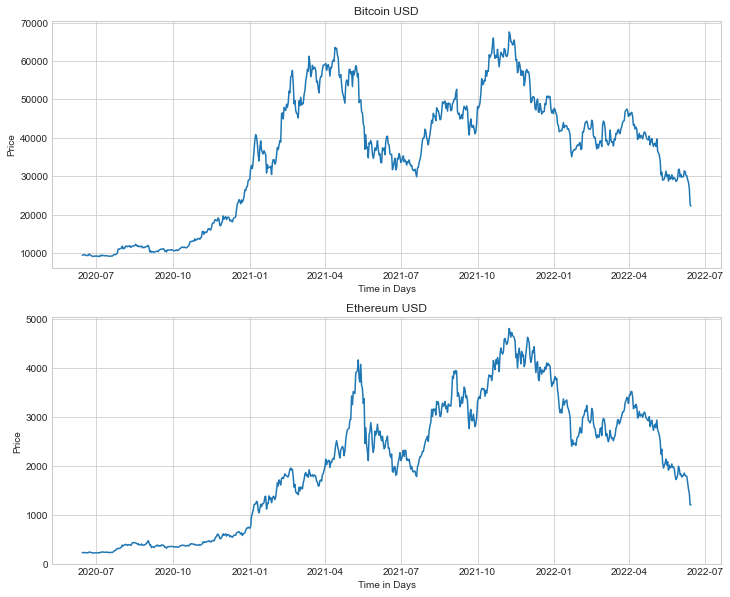

In [9]:
# Plot

fig = plt.figure()

plt.subplot(211)
plt.plot(Prices)
plt.title("Bitcoin USD")
plt.xlabel('Time in Days')
plt.ylabel('Price')

plt.subplot(212)
plt.plot(Prices2)
plt.title("Ethereum USD")
plt.xlabel('Time in Days')
plt.ylabel('Price')

fig.set_size_inches(12, 10)
fig.savefig('Price_BTC_ETH.pdf', format='pdf', dpi=1000)
fig.savefig('Price_BTC_ETH.eps', format='eps', dpi=1000)
plt.show()

In [2]:
sublen = len(return_for_Prices.loc['2020-06-15':'2021-06-15'])  # length of TRAINING window: 1y
t_per_sub = 1/sublen

# math -> np.float128

annualreturn = sublen * np.float128(return_for_Prices['Adj Close'].iloc[: sublen].mean())
annualrevola = np.sqrt(sublen) * np.float128(return_for_Prices['Adj Close'].iloc[: sublen].std())

S0 = np.float128(Prices['Adj Close'].iloc[sublen])
print('[Bitcoin]')
print('training window:', sublen, 'days')
print('mean:', annualreturn, ',std:', annualrevola)
print('initial price (test):', S0)

sublen2 = len(return_for_Prices2.loc['2020-06-15':'2021-06-15'])
t_per_sub2 = 1/sublen2

annualreturn2 = sublen2 * np.float128(return_for_Prices2['Adj Close'].iloc[: sublen2].mean())
annualrevola2 = np.sqrt(sublen2) * np.float128(return_for_Prices2['Adj Close'].iloc[: sublen2].std())

S02 = np.float128(Prices2['Adj Close'].iloc[sublen2])
print('[Ethereum]')
print('training window:', sublen2, 'days')
print('mean:', annualreturn2, ',std:', annualrevola2)
print('initial price (test):', S02)

[Bitcoin]
training window: 366 days
mean: 1.7334218060501787 ,std: 0.7394321960450927
initial price (test): 40406.26953125
[Ethereum]
training window: 366 days
mean: 2.9505329651788483 ,std: 1.03091789453591
initial price (test): 2610.936767578125


In [3]:
# constraint set of gamma (historical: same bounds)
# math -> np.float128

# Bitcoin

max_X = np.float128(return_for_Prices.loc['2020-06-15':'2021-06-15'].max())
min_X = np.float128(return_for_Prices.loc['2020-06-15':'2021-06-15'].min())
max_gamma = 1/abs(min_X)
min_gamma = -1/max_X
print('[Bitcoin]')
print(min_X, max_X)
print(min_gamma, max_gamma)

# Ethereum

max_X2 = np.float128(return_for_Prices2.loc['2020-06-15':'2021-06-15'].max())
min_X2 = np.float128(return_for_Prices2.loc['2020-06-15':'2021-06-15'].min())
max_gamma2 = 1/abs(min_X2)
min_gamma2 = -1/max_X2
print('[Ethereum]')
print(min_X2, max_X2)
print(min_gamma2, max_gamma2)

[Bitcoin]
-0.13766122609163733 0.18746473766529936
-5.334336539522466 7.2642095991091
[Ethereum]
-0.2720034941722024 0.2594753293956862
-3.8539309395193126 3.6764233600870995


In [163]:
#define two NumPy arrays
array1 = np.array([[1100, 1050]])
array2 = np.array([[1200, 4000]])
#perform complex mathematical operation
np.exp(-3*array1).sum() / np.exp(-3*array2).sum()
# RuntimeWarning: invalid value encountered in double_scalars 


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_96672/1251306447.py:5: RuntimeWarning: invalid value encountered in double_scalars
  np.exp(-3*array1).sum() / np.exp(-3*array2).sum()


nan

In [164]:
#define two NumPy arrays
array1 = np.array([[1100, 1050]])
array2 = np.array([[1200, 4000]])
#perform complex mathematical operation
np.exp(logsumexp(-3*array1) - logsumexp(-3*array2))
#2.7071782767869983e+195 


2.7071782767869983e+195

In [217]:
x = random.gauss(mu = 0, sigma = 1)
print(type(x))
x = np.float128(x)
print(type(x))

<class 'float'>
<class 'numpy.float128'>


In [300]:
def J_wo_gamma(gamma, stimu, max_d, V_start, S0, annualreturn, annualrevola, sublen):
    old_settings = np.seterr(all='warn')
    Ji_list = []
    # vklist = []
    max_V = V_start
    Vk = V_start
    sublen = int(sublen)
    for i in range(stimu):
        for t in range(sublen):
            x = random.gauss(mu = 0, sigma = 1)
            x = np.float128(x)
            # S1 = expm1((annualreturn - ((annualrevola**2)/2))/sublen 
            #               + (annualrevola*x*math.sqrt(1/sublen))) * S0 + S0
            mess1 = (annualreturn - ((annualrevola**2)/2))/sublen
            mess2 = annualrevola*x*np.sqrt(1/sublen)
            try:
                m1 = np.exp(mess1)
            except:
                m1 = 0
            try:
                m2 = np.exp(mess2)
            except:
                m2 = 0
            # S1 = m1 * m2 * S0
            # re = (S1-S0) / S0  # daily return
            re = m1*m2 - 1
            dk = (max_V-Vk) / max_V
            try:
                Mk = (max_d-dk) / (1-dk)
            except:
                Mk = 0
            
            Vk1 = Vk * (1 + (gamma*Mk*re))
            if Vk1 < 0:
                Vk1 = 0
            if Vk1 >= max_V:
                max_V = Vk1
            Vk = Vk1  # update the account value
            # S0 = re*S0 + 1  # update the stock price
        # vklist.append(Vk)
        Ji = np.log(Vk/V_start)
        Ji_list.append(Ji)
    return np.mean(Ji_list) / sublen

In [220]:
try:
    m1 = np.exp(-1000)
except:
    m1 = 0
    print(1)
print(m1)

0.0


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/285372273.py:2: RuntimeWarning: underflow encountered in exp
  m1 = np.exp(-1000)


In [365]:
print(math.floor(3.5555555 * 100) / 100.0)  # 1.23 無條件捨去至小數點後 2 位

3.55


In [13]:
# 生成1000個區間內的gamma,模擬300次
# Bitcoin

r_list = []
Jr_list = []
# count = 0
for r in range(100):
    # count+=1
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 300, 0.05, 10000, S0, annualreturn, annualrevola, sublen))

# Ethereum

r_list2 = []
Jr_list2 = []

for r in range(100):
    r = np.random.uniform(min_gamma2, max_gamma2)  # 代過去的資料
    r_list2.append(r)
    Jr_list2.append(J_wo_gamma(r, 300, 0.05, 10000, S02, annualreturn2, annualrevola2, sublen2))


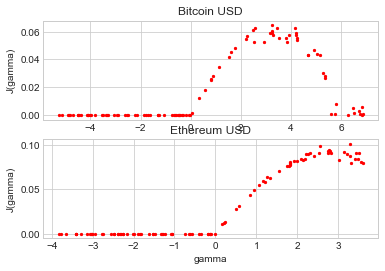

In [14]:
# Plot

fig = plt.figure()

plt.subplot(211)
plt.scatter(r_list, Jr_list, color='red', s=5)
plt.title("Bitcoin USD")
plt.xlabel("gamma") 
plt.ylabel("J(gamma)")

plt.subplot(212)
plt.scatter(r_list2, Jr_list2, color='red', s=5)
plt.title("Ethereum USD")
plt.xlabel("gamma") 
plt.ylabel("J(gamma)")

#fig.set_size_inches(12, 10)
#fig.savefig('gamma_BTC_ETH.pdf', format='pdf', dpi=1000)
#fig.savefig('gamma_BTC_ETH.eps', format='eps', dpi=1000)
plt.show()

In [370]:
# 從模擬結果找最佳解
# Bitcoin

print('[Bitcoin]')
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

# Ethereum

print('[Ethereum]')
index2 = Jr_list2.index(max(Jr_list2))
print('max J(r) =', max(Jr_list2))
gamma_star2 = r_list2[index2]
print('gamma* = ', gamma_star2)

[Bitcoin]
max J(r) = 0.06337922421073224
gamma* =  2.845687643145233
[Ethereum]
max J(r) = 0.09401995019574526
gamma* =  2.896983359647787


BTC avg return: 0.16708072759910192
ETH avg return: 0.2527687361735685


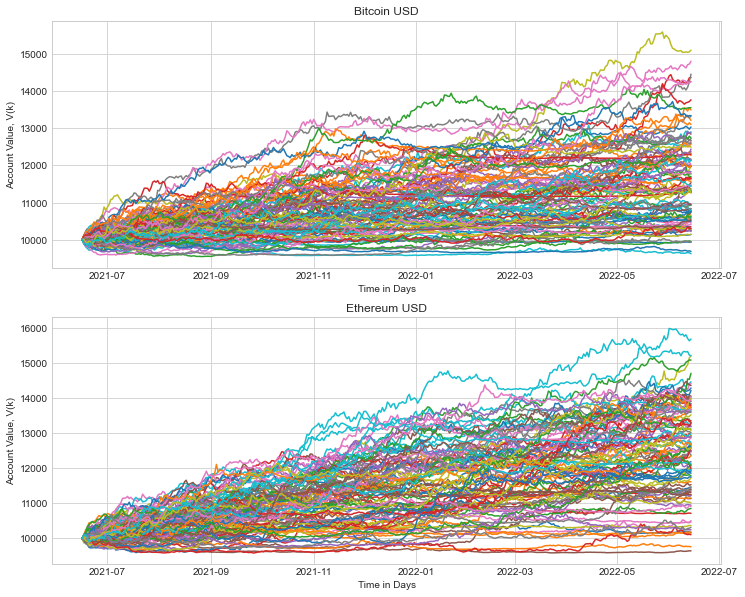

In [17]:
# Max Drawdown (gamma_star)
# Bitcoin

S0_pred = Prices['Adj Close'].loc['2021-06-16']
# S0_pred = Prices.iloc[new]['Adj Close']  # initial price
Vk_data = pd.DataFrame.copy(Prices.loc['2021-06-16':'2022-06-15'])
sublen_pred = len(return_for_Prices.loc['2021-06-16':'2022-06-15'])  # length of a window: 1y
column_names = []

Vks = 0
V_start = 10000  # initial value of the account
stimu_pre = 100  # number of path

for i in range(stimu_pre):
    column_names.append('DD'+str(i))
    Vk_list = [V_start]
    max_V = V_start
    Vk = V_start
    max_d = 0.05
    for t in range(sublen_pred-1):
        x = random.gauss(mu = 0, sigma = 1)
        S1 = math.exp((annualreturn - ((annualrevola**2)/2))*t_per_sub 
                      + (annualrevola*x*math.sqrt(t_per_sub))) * S0_pred
        re = (S1-S0_pred) / S0_pred  # daily return
        dk = (max_V-Vk) / max_V
        Mk = (max_d-dk) / (1-dk)
        Vk1 = Vk * (1 + (gamma_star*Mk*re))
        Vk_list.append(Vk1)
        if Vk1 >= max_V:
            max_V = Vk1
        Vk = Vk1  # update the account value
        S0_pred = S1  # update the stock price
    Vks += Vk
    Vk_data.insert(i+1, column_names[-1], Vk_list) 

Vk_data = Vk_data.drop('Adj Close', axis=1)
print('BTC avg return:', (Vks/stimu_pre - V_start) / V_start)

# Ethereum

S0_pred2 = Prices2['Adj Close'].loc['2021-06-16']  # initial price
Vk_data2 = pd.DataFrame.copy(Prices2.loc['2021-06-16':'2022-06-15'])
sublen_pred2 = len(return_for_Prices2.loc['2021-06-16':'2022-06-15'])  # length of a window: 1y
column_names = []

Vks = 0

for i in range(stimu_pre):
    column_names.append('DD'+str(i))
    Vk_list = [V_start]
    max_V = V_start
    Vk = V_start
    max_d = 0.05
    for t in range(sublen_pred2-1):
        x = random.gauss(mu = 0, sigma = 1)
        S1 = math.exp((annualreturn2 - ((annualrevola2**2)/2))*t_per_sub2
                      + (annualrevola2*x*math.sqrt(t_per_sub2))) * S0_pred2
        re = (S1-S0_pred2) / S0_pred2  # daily return
        dk = (max_V-Vk) / max_V
        Mk = (max_d-dk) / (1-dk)
        Vk1 = Vk * (1 + (gamma_star2*Mk*re))
        Vk_list.append(Vk1)
        if Vk1 >= max_V:
            max_V = Vk1
        Vk = Vk1  # update the account value
        S0_pred2 = S1  # update the stock price
    Vks += Vk
    Vk_data2.insert(i+1, column_names[-1], Vk_list) 

Vk_data2 = Vk_data2.drop('Adj Close', axis=1)
print('ETH avg return:', (Vks/stimu_pre - V_start) / V_start)

# Plot

fig = plt.figure()

plt.subplot(211)
plt.plot(Vk_data)
plt.title("Bitcoin USD")
plt.xlabel("Time in Days") 
plt.ylabel("Account Value, V(k)")

plt.subplot(212)
plt.plot(Vk_data2)
plt.title("Ethereum USD")
plt.xlabel("Time in Days") 
plt.ylabel("Account Value, V(k)")

fig.set_size_inches(12, 10)
fig.savefig('DD_BTC_ETH_100.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_ETH_100.eps', format='eps', dpi=1000)
plt.show()

In [59]:
print(Prices2['Adj Close'].loc['2021-04-16'])

1.0023449659347534


/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3364: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


Portfolio avg return: 0.5096409413230658


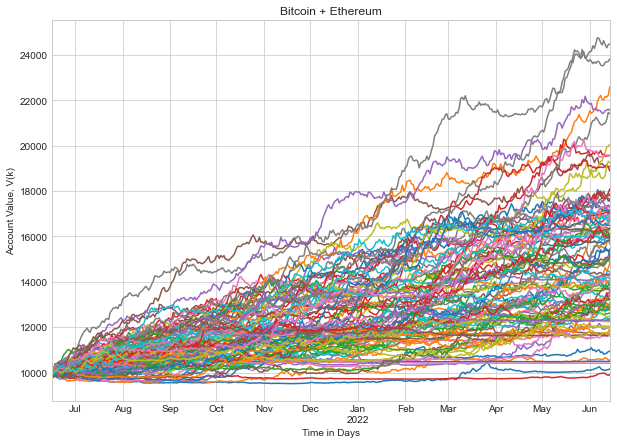

In [19]:
# Max Drawdown (gamma_star & gamma_star2)
# Portfolio

Vk_data_port = pd.DataFrame.copy(Prices2.loc['2021-06-16':'2022-06-15'])
column_names = []

Vks = 0

for i in range(stimu_pre):
    column_names.append('DD'+str(i))
    Vk_list = [V_start]
    max_V = V_start
    Vk = V_start
    max_d = 0.05
    for t in range(sublen_pred-1):  # sublen_pred = sublen_pred2
        x = random.gauss(mu = 0, sigma = 1)
        y = random.gauss(mu = 0, sigma = 1)
        S1_1 = math.exp((annualreturn - ((annualrevola**2)/2))*t_per_sub
                      + (annualrevola*x*math.sqrt(t_per_sub))) * S0_pred
        re_1 = (S1_1-S0_pred) / S0_pred  # daily return: BTC
        S1_2 = math.exp((annualreturn2 - ((annualrevola2**2)/2))*t_per_sub2
                      + (annualrevola2*y*math.sqrt(t_per_sub2))) * S0_pred2
        re_2 = (S1_2-S0_pred2) / S0_pred2  # daily return: USDT
        
        dk = (max_V-Vk) / max_V
        Mk = (max_d-dk) / (1-dk)
        Vk1 = Vk * (1 + (gamma_star*Mk*re_1) + (gamma_star2*Mk*re_2))  # r + r2
        Vk_list.append(Vk1)
        if Vk1 >= max_V:
            max_V = Vk1
        Vk = Vk1
        S0_pred1 = S1_1
        S0_pred2 = S1_2
    Vks += Vk
    Vk_data_port.insert(i+1, column_names[-1], Vk_list) 

Vk_data_port = Vk_data_port.drop('Adj Close', axis=1)
print('Portfolio avg return:', (Vks/stimu_pre - V_start) / V_start)

Vk_data_port.plot(title = "Bitcoin + Ethereum", legend=None)
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTCETH_100.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTCETH_100.eps', format='eps', dpi=1000)
plt.show()

# Brief summary
# Gamma*

BTC: 3.0592135115317998 --> 3.06
ETH: 2.2288703880907588 --> 2.23

# Avg return

BTC: 0.16708072759910192 --> 16.71%
ETH: 0.2527687361735685 --> 25.28%
Portfolio: 0.5096409413230658 --> 50.96%

# restart strategy: |dmax - d(k)|< epsilon
# 注意dataframe的結構改變
要知道什麼時候撞到d_max
撞到 d_max後一個交易日進場 (從最後一天的帳戶餘額繼續)
用原來的gamma和他的上下界 (長期趨勢)

In [20]:
Prices_reset = Prices.reset_index()
print(Prices_reset)
Prices2_reset = Prices2.reset_index()
print(Prices2_reset)

          Date     Adj Close
0   2020-06-14   9386.788086
1   2020-06-15   9450.702148
2   2020-06-16   9538.024414
3   2020-06-17   9480.254883
4   2020-06-18   9411.840820
..         ...           ...
726 2022-06-10  29083.804688
727 2022-06-11  28360.810547
728 2022-06-12  26762.648438
729 2022-06-13  22487.388672
730 2022-06-14  22206.792969

[731 rows x 2 columns]
          Date    Adj Close
0   2020-06-14   234.114700
1   2020-06-15   229.928909
2   2020-06-16   234.416168
3   2020-06-17   233.028275
4   2020-06-18   232.101166
..         ...          ...
726 2022-06-10  1665.042236
727 2022-06-11  1529.663452
728 2022-06-12  1445.216553
729 2022-06-13  1204.582764
730 2022-06-14  1211.662842

[731 rows x 2 columns]


In [21]:
# length of testing window: 1y

Y2 = len(return_for_Prices.loc['2021-06-16':'2022-06-15'])

Y22 = len(return_for_Prices2.loc['2021-06-16':'2022-06-15'])

In [22]:
def GammaBound(t0, t1, data):
    '''t0, t1: string, data: dataframe'''
    # constraint set of gamma(t= t0~ t1)
    # print(t0, t1)
    
    max_Xt = data.loc[t0:t1].max()
    min_Xt = data.loc[t0:t1].min()
    max_gamma = 1/abs(float(min_Xt))
    min_gamma = -1/float(max_Xt)
    
    return max_gamma, min_gamma

In [24]:
# Does GammaBound work?

print('Bitcoin:', GammaBound('2021-06-16', '2022-06-15', return_for_Prices))
print('Ethereum:', GammaBound('2021-06-16', '2022-06-15', return_for_Prices2))

Bitcoin: (6.2598882651958725, -6.877019126447987)
Ethereum: (6.005875394161739, -8.560886415194723)


# Y2_day0_index, Y2_day0_index2

In [23]:
Y2_day0_index = (Prices_reset.index[Prices_reset['Date'] == '2021-06-16']).tolist()
new = [i+1 for i in Y2_day0_index]
print('[Bitcoin]')
print(Prices_reset.iloc[Y2_day0_index])

Y2_day0_index2 = (Prices2_reset.index[Prices2_reset['Date'] == '2021-06-16']).tolist()
new2 = [i+1 for i in Y2_day0_index2]
print('[Ethereum]')
print(Prices2_reset.iloc[Y2_day0_index2])

[Bitcoin]
          Date   Adj Close
367 2021-06-16  38347.0625
[Ethereum]
          Date    Adj Close
367 2021-06-16  2367.663574


# Restart Functions

# Bitcoin

def Restart(t, t1, gamma, dmax, epsilon, V_start):
    '''如果撞到限制（|dmax - max d(k)|< epsilon）就出場，帳戶餘額留在沒撞到的上個時間點'''
    '''t, t1: time string'''
    
    Vi_list = [V_start]  # 放每一期的帳戶餘額
    max_Vi = V_start  # V_max
    Vi = V_start  # V(i)
    max_dk = 0
    hit = 0
    d_list = []
    t_index = (Prices.index[Prices['Date'] == t]).tolist()
    t1_index = (Prices.index[Prices['Date'] == t1]).tolist()
    v = list(map(lambda x: x[0]-x[1], zip(t1_index, t_index)))
    delta = v[0]
    
    for i in range(0, delta):
        ith_day_length = i + t_index[0]
        di = (max_Vi-Vi) / max_Vi
        
        # 如果撞到限制迴圈就不繼續跑, 也不更新最大跌幅
        if abs(dmax - di) < epsilon:
            hit = ith_day_length  # index->要改成日期(time string)
            break
        if di >= max_dk:
            max_dk = di  # update
        d_list.append(di)
        
        # 如果天數不滿一年就繼續run
        if ith_day_length != Y2 - 1:
            Mi = (max_d-di) / (1-di)
            Vi_1 = Vi * (1 + (gamma*Mi*float(return_for_Prices.iloc[ith_day_length])))
            Vi_list.append(Vi_1)
            if Vi_1 >= max_Vi:
                max_Vi = Vi_1
            Vi = Vi_1
    return Vi_list, hit, d_list

# Ethereum

def Restart2(t, t1, gamma, dmax, epsilon, V_start):
    '''如果撞到限制（|dmax - max d(k)|< epsilon）就出場，帳戶餘額留在沒撞到的上個時間點'''
    '''t, t1: time string'''
    
    Vi_list = [V_start]  # 放每一期的帳戶餘額
    max_Vi = V_start  # V_max
    Vi = V_start  # V(i)
    max_dk = 0
    hit = 0
    d_list = []
    t_index = (Prices2_reset.index[Prices2_reset['Date'] == t]).tolist()
    t1_index = (Prices2_reset.index[Prices2_reset['Date'] == t1]).tolist()
    v = list(map(lambda x: x[0]-x[1], zip(t1_index, t_index)))
    delta = v[0]

    for i in range(0, delta):
        ith_day_length = i + t_index[0]
        di = (max_Vi-Vi) / max_Vi
        
        # 如果撞到限制迴圈就不繼續跑, 也不更新最大跌幅
        if abs(dmax - di) < epsilon:
            hit = ith_day_length  # index->要改成日期(time string)
            break
        if di >= max_dk:
            max_dk = di  # update
        d_list.append(di)
        
        # 如果天數不滿一年就繼續run
        if ith_day_length != Y22 - 1:
            Mi = (max_d-di) / (1-di)
            Vi_1 = Vi * (1 + (gamma*Mi*float(return_for_Prices2.iloc[ith_day_length])))
            Vi_list.append(Vi_1)
            if Vi_1 >= max_Vi:
                max_Vi = Vi_1
            Vi = Vi_1
    return Vi_list, hit, d_list

# 改過dmax, np.float128, etc

In [229]:
# Portfolio

def RestartP(t, t1, gamma, gamma2, dmax, epsilon, V_start):
    '''如果撞到限制（|dmax - max d(k)|< epsilon）就出場，帳戶餘額留在沒撞到的上個時間點'''
    '''t, t1: time string'''
    
    Vi_list = [V_start]  # 放每一期的帳戶餘額
    max_Vi = V_start  # V_max
    Vi = V_start  # V(i)
    hit = 0
    d_list = []
    
    t_index = (Prices_reset.index[Prices_reset['Date'] == t]).tolist()  # 從哪期開始跑
    t1_index = (Prices_reset.index[Prices_reset['Date'] == t1]).tolist()  # 跑到哪期
    v = list(map(lambda x: x[0]-x[1], zip(t1_index, t_index)))
    delta = v[0]  # 兩個時間點的差距

    for i in range(0, delta):
        ith_day_length = i + t_index[0]
        
        di = (max_Vi-Vi) / max_Vi
        '''
        if di > dmax:
            print('===WARNING from RestartP===')
            print('max_Vi:', max_Vi)
            print('Vi:', Vi)
            print('di:', di)
            print('t_index:', Prices_reset['Date'][t_index])
            if abs(dmax - di) < epsilon:
                print('abs(dmax - di) < epsilon')
            else:
                print('abs(dmax - di) >= epsilon')
        # 如果撞到限制迴圈就不繼續跑, 也不更新最大跌幅
        if abs(dmax - di) < epsilon:
            hit = ith_day_length  # index->要改成日期(time string)
            break'''
        if (dmax - di) < epsilon:
            hit = ith_day_length  # index->要改成日期(time string)
            break
        d_list.append(di)
        
        # 如果天數不滿一年就繼續run
        if ith_day_length != Y2 - 1:  # Y2 == Y22

            try:
                Mi = (dmax-di) / (1-di)
            except:
                Mi = 0

            Vi_1 = Vi * (1 + (gamma*Mi*np.float128(return_for_Prices.iloc[ith_day_length])
                              + (gamma2*Mi*np.float128(return_for_Prices2.iloc[ith_day_length]))))
            if Vi_1 < 0:
                Vi_1 = 0
            Vi_list.append(Vi_1)
            if Vi_1 >= max_Vi:
                max_Vi = Vi_1
            Vi = Vi_1  # update the account value to the next (i-th) run
    return Vi_list, hit, d_list

In [346]:
# Portfolio

def J_wo_gamma_t0t1_P(t0, t1, gamma, gamma2, stimu, dmax, V_start):
    '''objective function, gammas as inputs, t0 ~ t1, %Y-%m-%d'''
    old_settings = np.seterr(all='log')
    Ji_list = []
    # vklist = []
    max_V = V_start
    Vk = V_start

    sublen_t0t1 = len(return_for_Prices.loc[t0:t1])
    t_per_sub = 1/sublen_t0t1
    
    # BTC
    annualreturn_t0t1 = sublen_t0t1 * np.float128(return_for_Prices['Adj Close'].loc[t0:t1].mean())
    annualrevola_t0t1 = np.sqrt(sublen_t0t1) * np.float128(return_for_Prices['Adj Close'].loc[t0:t1].std())
    S0_list = [i+1 for i in (Prices_reset.index[Prices_reset['Date'] == t1]).tolist()]
    S0_t1 = Prices_reset['Adj Close'][S0_list[0]]
    # ETH
    annualreturn_t0t1_2 = sublen_t0t1 * np.float128(return_for_Prices2['Adj Close'].loc[t0:t1].mean())
    annualrevola_t0t1_2 = np.sqrt(sublen_t0t1) * np.float128(return_for_Prices2['Adj Close'].loc[t0:t1].std())
    S02_list = [i+1 for i in (Prices2_reset.index[Prices2_reset['Date'] == t1]).tolist()]
    S02_t1 = Prices2_reset['Adj Close'][S02_list[0]]    
        
    for i in range(stimu):
        for t in range(sublen_t0t1):
            x = random.gauss(mu = 0, sigma = 1)
            y = random.gauss(mu = 0, sigma = 1)            
            #S1_1 = math.exp((annualreturn_t0t1 - ((annualrevola_t0t1**2)/2))*t_per_sub 
            #              + (annualrevola_t0t1*x*math.sqrt(t_per_sub))) * S0_t1
            try:
                e_1 = np.exp((annualreturn_t0t1 - ((annualrevola_t0t1**2)/2))*t_per_sub 
                          + (annualrevola_t0t1*x*np.sqrt(t_per_sub)))
            except:
                e_1 = 0
            re_1 = e_1 - 1
            try:
                e_2 = np.exp((annualreturn_t0t1_2 - ((annualrevola_t0t1_2**2)/2))*t_per_sub 
                          + (annualrevola_t0t1_2*y*np.sqrt(t_per_sub)))
            except:
                e_2 = 0
            re_2 = e_2 - 1
            #re_1 = (S1_1-S0_t1) / S0_t1  # daily return: BTC
            
            #S1_2 = math.exp((annualreturn_t0t1_2 - ((annualrevola_t0t1_2**2)/2))*t_per_sub 
            #              + (annualrevola_t0t1_2*y*math.sqrt(t_per_sub))) * S02_t1
            #re_2 = (S1_2-S02_t1) / S02_t1  # daily return: ETH   
            try:
                dk = (max_V-Vk) / max_V
            except:
                dk = 0
                print('J_wo_gamma_t0t1_P')

            try:
                Mk = (dmax-dk) / (1-dk)
            except:
                Mk = 0
            
            try:
                Vk1 = Vk * (1 + (gamma*Mk*re_1) + (gamma2*Mk*re_2))
            except:
                Vk1 = Vk
            if Vk1 < 0:
                Vk1 = 0
            if Vk1 >= max_V:
                max_V = Vk1
            Vk = Vk1  # update the account value
        # vklist.append(Vk)
        Ji = np.log(Vk/V_start)
        Ji_list.append(Ji)
    return np.mean(Ji_list) / sublen_t0t1

In [345]:
# Bitcoin

def J_wo_gamma_t0t1(t0, t1, gamma, stimu, dmax, V_start):
    '''objective function, gamma as an input, t0 ~ t1, %Y-%m-%d'''
    old_settings = np.seterr(all='warn')
    Ji_list = []
    # vklist = []
    max_V = V_start
    Vk = V_start
    
    sublen_t0t1 = len(return_for_Prices.loc[t0:t1])
    t_per_sub = 1/sublen_t0t1
    annualreturn_t0t1 = sublen_t0t1 * np.float128(return_for_Prices['Adj Close'].loc[t0:t1].mean())
    annualrevola_t0t1 = np.sqrt(sublen_t0t1) * np.float128(return_for_Prices['Adj Close'].loc[t0:t1].std())
    S0_list = [i+1 for i in (Prices_reset.index[Prices_reset['Date'] == t1]).tolist()]
    S0_t1 = Prices_reset['Adj Close'][S0_list[0]]

    for i in range(stimu):
        for t in range(sublen_t0t1):
            x = random.gauss(mu = 0, sigma = 1)
            #S1 = math.exp((annualreturn_t0t1 - ((annualrevola_t0t1**2)/2))*t_per_sub 
            #              + (annualrevola_t0t1*x*math.sqrt(t_per_sub))) * S0_t1
            #re = (S1-S0_t1) / S0_t1       
            try:
                e = np.exp((annualreturn_t0t1 - ((annualrevola_t0t1**2)/2))*t_per_sub 
                              + (annualrevola_t0t1*x*np.sqrt(t_per_sub)))
            except:
                e = 0
            re = e - 1  # daily return
            #dk = (max_V-Vk) / max_V
            try:
                dk = (max_V-Vk) / max_V
            except:
                dk = 0
                print('J_wo_gamma_t0t1')
            try:
                Mk = (dmax-dk) / (1-dk)
            except:
                Mk = 0
            try:
                Vk1 = Vk * (1 + (gamma*Mk*re))
            except:
                Vk1 = Vk
            if Vk1 < 0:
                Vk1 = 0
            if Vk1 >= max_V:
                max_V = Vk1
            Vk = Vk1  # update the account value
        # vklist.append(Vk)
        Ji = np.log(Vk/V_start)
        Ji_list.append(Ji)
    return np.mean(Ji_list) / sublen_t0t1

# Ethereum

def J_wo_gamma_t0t1_2(t0, t1, gamma, stimu, dmax, V_start):
    '''objective function, gamma as an input, t0 ~ t1, %Y-%m-%d'''
    old_settings = np.seterr(all='warn')
    Ji_list = []
    # vklist = []
    max_V = V_start
    Vk = V_start
    
    sublen_t0t1 = len(return_for_Prices2.loc[t0:t1])
    t_per_sub = 1/sublen_t0t1
    annualreturn_t0t1 = sublen_t0t1 * np.float128(return_for_Prices2['Adj Close'].loc[t0:t1].mean())
    annualrevola_t0t1 = np.sqrt(sublen_t0t1) * np.float128(return_for_Prices2['Adj Close'].loc[t0:t1].std())
    S0_list = [i+1 for i in (Prices2_reset.index[Prices2_reset['Date'] == t1]).tolist()]
    S0_t1 = Prices2_reset['Adj Close'][S0_list[0]]

    for i in range(stimu):
        for t in range(sublen_t0t1):
            x = random.gauss(mu = 0, sigma = 1)
            #S1 = math.exp((annualreturn_t0t1 - ((annualrevola_t0t1**2)/2)) * t_per_sub 
            #              + (annualrevola_t0t1*x*math.sqrt(t_per_sub))) * S0_t1
            #re = (S1-S0_t1) / S0_t1
            try:
                e = np.exp((annualreturn_t0t1 - ((annualrevola_t0t1**2)/2))*t_per_sub 
                              + (annualrevola_t0t1*x*np.sqrt(t_per_sub)))
            except:
                e = 0
            re = e - 1  # daily return
            try:
                dk = (max_V-Vk) / max_V
            except:
                dk = 0
                print('J_wo_gamma_t0t1_2')
            dk = (max_V-Vk) / max_V
            try:
                Mk = (dmax-dk) / (1-dk)
            except:
                Mk = 0
            try:
                Vk1 = Vk * (1 + (gamma*Mk*re))
            except:
                Vk1 = Vk
            if Vk1 < 0:
                Vk1 = 0
            if Vk1 >= max_V:
                max_V = Vk1
            Vk = Vk1  # update the account value
        # vklist.append(Vk)
        Ji = np.log(Vk/V_start)
        Ji_list.append(Ji)
    return np.mean(Ji_list) / sublen_t0t1

# GetGamma functions

def GetGamma(t0, t1, dmax, V_start):
    '''從歷史資料找最佳的gamma'''
    t1_index = (Prices_reset.index[Prices_reset['Date'] == t1]).tolist()
    t1_1_index = [i-1 for i in t1_index]
    T1 = str(Prices_reset['Date'][t1_1_index[0]])[:10]
    
    max_gamma, min_gamma = GammaBound(t0, T1, return_for_Prices)
    r_list = []
    Jr_list = []
    for r in range(1000):
        r = np.random.uniform(min_gamma, max_gamma)
        r_list.append(r)
        Jr_list.append(J_wo_gamma_t0t1(t0, T1, r, 1000, dmax, V_start))
    index = Jr_list.index(max(Jr_list))
    gamma_star = r_list[index]
    return max(Jr_list), gamma_star

def GetGamma2(t0, t1, dmax, V_start):
    '''從歷史資料找最佳的gamma'''
    t1_index = (Prices2_reset.index[Prices2_reset['Date'] == t1]).tolist()
    t1_1_index = [i-1 for i in t1_index]
    T1 = str(Prices2_reset['Date'][t1_1_index[0]])[:10]
    
    max_gamma, min_gamma = GammaBound(t0, T1, return_for_Prices2)
    r_list = []
    Jr_list = []
    for r in range(1000):
        r = np.random.uniform(min_gamma, max_gamma)
        r_list.append(r)
        Jr_list.append(J_wo_gamma_t0t1_2(t0, T1, r, 1000, dmax, V_start))
    index = Jr_list.index(max(Jr_list))
    gamma_star = r_list[index]
    return max(Jr_list), gamma_star

# 要改？？？
the constraint on γ as follows: |Xmin| γ+ − Xmax γ− ≤ 1
γi− =. min{γi, 0}; γi+ =. max{γi, 0}.

In [115]:
def GammaBoundP(t0, t1, data, data2):
    '''t0, t1: string, data: dataframe'''
    # constraint set of gamma(t= t0~ t1)
    
    max_Xt = data.loc[t0:t1].max()
    min_Xt = data.loc[t0:t1].min()
    max_gamma = 1/abs(np.float128(min_Xt))
    min_gamma = -1/np.float128(max_Xt)
    
    max_Xt2 = data2.loc[t0:t1].max()
    min_Xt2 = data2.loc[t0:t1].min()
    max_gamma2 = 1/abs(np.float128(min_Xt2))
    min_gamma2 = -1/np.float128(max_Xt2)
    
    return max_gamma, min_gamma, max_gamma2, min_gamma2

In [116]:
def GetGammaP(t0, t1, dmax, V_start):
    '''從歷史資料找最佳的gamma'''
    t1_index = (Prices2_reset.index[Prices2_reset['Date'] == t1]).tolist()
    t1_1_index = [i-1 for i in t1_index]
    T1 = str(Prices2_reset['Date'][t1_1_index[0]])[:10]
    
    max_r, min_r, max_r2, min_r2 = GammaBoundP(t0, T1, return_for_Prices, return_for_Prices2)
    r_list = []
    r2_list = []
    Jr_list = []
    Jr2_list = []
    for i in range(300):
        r = np.random.uniform(min_r, max_r)
        r2 = np.random.uniform(min_r2, max_r2)
        r = np.float128(r)
        r2 = np.float128(r2)
        r_list.append(r)
        r2_list.append(r2)
        Jr_list.append(J_wo_gamma_t0t1(t0, T1, r, 100, dmax, V_start))
        Jr2_list.append(J_wo_gamma_t0t1_2(t0, T1, r2, 100, dmax, V_start))
    index = Jr_list.index(max(Jr_list))
    gamma_star = r_list[index]
    index2 = Jr2_list.index(max(Jr2_list))
    gamma_star2 = r2_list[index2]
    return max(Jr_list), gamma_star, max(Jr2_list), gamma_star2

# 一季

# Bitcoin
# 改成restart日和前一季算出來的gamma

ep = 0.005
max_d = 0.05

delta = int(Y2 / 4)  # 自訂為一季

# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去1 y的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S0, annualreturn, annualrevola, sublen))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

# Ethereum
# 改成restart日和前一季算出來的gamma

ep = 0.005
max_d = 0.05

delta = int(Y2 / 4)  # 自訂為一季

# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma2, max_gamma2)  # 代過去1 y的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S02, annualreturn2, annualrevola2, sublen2))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star2 = r_list[index]
print('gamma* = ', gamma_star2)

# 用GetGammaP找t0~t1間股價推得個別最佳gamma*

In [301]:
# Portfolio
# 改成restart日和前一季算出來的gamma

delta = int(Y2 / 4)  # 自訂為一季

# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
r2_list = []
Jr2_list = []

for r in range(500):
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去1 y的資料
    r2 = np.random.uniform(min_gamma2, max_gamma2)
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S0, annualreturn, annualrevola, sublen))
    r2_list.append(r2)
    Jr2_list.append(J_wo_gamma(r, 100, 0.05, 10000, S02, annualreturn2, annualrevola2, sublen2))

print('[Bitcoin]')
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

print('[Ethereum]')
index2 = Jr2_list.index(max(Jr2_list))
print('max J(r) =', max(Jr2_list))
gamma_star2 = r2_list[index2]
print('gamma* = ', gamma_star2)

/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/2476985150.py:29: RuntimeWarning: divide by zero encountered in longdouble_scalars
  Mk = (max_d-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/2476985150.py:33: RuntimeWarning: invalid value encountered in longdouble_scalars
  Vk1 = Vk * (1 + (gamma*Mk*re))


[Bitcoin]
max J(r) = 0.02415636459756388561
gamma* =  4.665292017113947
[Ethereum]
max J(r) = 0.035107519963625268096
gamma* =  2.8873742279026486


In [295]:
# print(gamma_star, gamma_star2)
# 3.2503580154977794 1.8571117016715388

3.2503580154977794 1.8571117016715388


In [304]:
# Portfolio

c = 0  # 算跑幾輪

ep = 0.001
max_d = 0.05

V_start = 10000
V_all1 = [V_start]  # 使用策略

hits1 = ['2021-06-16']
d_list1 = [0]  # collection of drawdowns

while len(V_all1) < Y2:  # 前提 Y2 == Y22!!
    hits1_last_index = (Prices_reset.index[Prices_reset['Date'] == hits1[-1]]).tolist()
    hits1_last_delta_index = [i-delta for i in hits1_last_index]
    H1 = str(Prices_reset['Date'][hits1_last_delta_index[0]])[:10]
    print(H1, hits1[-1])  # updated training window
    if c == 0:
        ri_1 = gamma_star
        ri_2 = gamma_star2
    else:
        ri_1 = GetGammaP(H1, hits1[-1], max_d, V_all1[-1])[1]
        ri_2 = GetGammaP(H1, hits1[-1], max_d, V_all1[-1])[3]
    print('gammas:', ri_1, ri_2)
    
    Vi_list, hit, di_list = RestartP(hits1[-1], '2022-06-14', ri_1, ri_2, max_d, ep, V_all1[-1])
    # RestartP(t, t1, gamma, gamma1, dmax, epsilon, V_start)
    
    V_all1 += Vi_list[1:]
    d_list1 += di_list[1:]
    
    print('最大跌幅(使用策略):', max(d_list1), d_list1.index(max(d_list1)))
    print('帳戶餘額:', V_all1[-1])
    
    if hit != 0 and hit <= N:  # 前提 N == N2!!
        hittime = str(Prices_reset['Date'][hit])[:10]
        print('撞到限制的期數(使用策略):', hittime)
        hits1.append(hittime)
    c += 1
    print(c)

hits1 = hits1[1:]
print('=========================================')
print('帳戶餘額跑', len(V_all1), '輪')
print('撞到限制的期數彙整(使用策略):', hits1)

2021-03-17 2021-06-16
gammas: 4.665292017113947 2.8873742279026486
最大跌幅(使用策略): [0.02570636] 3
帳戶餘額: [9503.84532817]
撞到限制的期數(使用策略): 2021-06-21
1
2021-03-22 2021-06-21
gammas: -2.8896313764827575 1.2825824880968182
最大跌幅(使用策略): [0.03897231] 124
帳戶餘額: [9337.02283089]
2
帳戶餘額跑 364 輪
撞到限制的期數彙整(使用策略): ['2021-06-21']


In [305]:
for i in range(len(V_all1)):
    V_all1[i] = float(V_all1[i])
    V_all1[i] = math.floor(V_all1[i] * 10000) / 10000.0
print(V_all1[1:3], V_all1[-3: -1])

[9984.7882, 9767.3196] [9270.3875, 9325.036]


In [306]:
for i in range(len(d_list1)):
    d_list1[i] = float(d_list1[i])
print(max(d_list1), min(d_list1))

0.03897230879885919 0.0


In [307]:
# Portfolio

c_ori1 = 0  # 算跑幾輪

V_start = 10000
V_ori1 = [V_start]  # 原股價走勢（gamma = 1) -> for comparison

hits1_ori = ['2021-06-16']
d_list_ori = [0]  # collection of drawdowns

while len(V_ori1) < Y2:  # 前提 Y2 == Y22!!
    hits1_ori_last_index = (Prices_reset.index[Prices_reset['Date'] == hits1_ori[-1]]).tolist()
    hits1_ori_last_delta_index = [i-delta for i in hits1_ori_last_index]
    H1_ori = str(Prices_reset['Date'][hits1_ori_last_delta_index[0]])[:10]
    print(H1_ori, hits1_ori[-1])  # updated training window

    Vi_list_ori, hit_ori, di_list_ori = RestartP(hits1_ori[-1], '2022-06-14', 1, 1, max_d, ep, V_ori1[-1])
    
    V_ori1 += Vi_list_ori[1:]
    d_list_ori += di_list_ori[1:]
    
    print('最大跌幅(gamma = 1):', max(d_list_ori), d_list_ori.index(max(d_list_ori)))
    if hit_ori != 0 and hit_ori <= N:  # 前提 N == N2!!
        hittime_ori = str(Prices_reset['Date'][hit_ori])[:10]
        print('撞到限制的期數(gamma = 1):', hittime_ori)
        hits1_ori.append(hittime_ori)
    c_ori1 += 1
    print(c_ori1)

hits1_ori = hits1_ori[1:]
print('=========================================')

print('帳戶餘額跑', len(V_ori1), '輪')
print('撞到限制的期數彙整(gamma = 1):', hits1_ori)

2021-03-17 2021-06-16
最大跌幅(gamma = 1): [0.04696709] 362
1
帳戶餘額跑 364 輪
撞到限制的期數彙整(gamma = 1): []


In [308]:
for i in range(len(V_ori1)):
    V_ori1[i] = float(V_ori1[i])
    V_ori1[i] = math.floor(V_ori1[i] * 10000) / 10000.0
print(V_ori1[1:3], V_ori1[-3: -1])

[9997.0885, 9938.0892] [10088.3908, 10072.8684]


          Date     Restart
367 2021-06-16  10000.0000
368 2021-06-17   9984.7882
369 2021-06-18   9767.3196
370 2021-06-19   9742.9363
371 2021-06-20   9767.4111
          Date    Restart
726 2022-06-10  9258.5876
727 2022-06-11  9251.8217
728 2022-06-12  9270.3875
729 2022-06-13  9325.0360
730 2022-06-14  9337.0228
最後一天的帳戶餘額: 9337.0228
Return: -0.06629771999999994
SD: 102.53883429753611
Sharpe Ratio: -0.012335617916047224


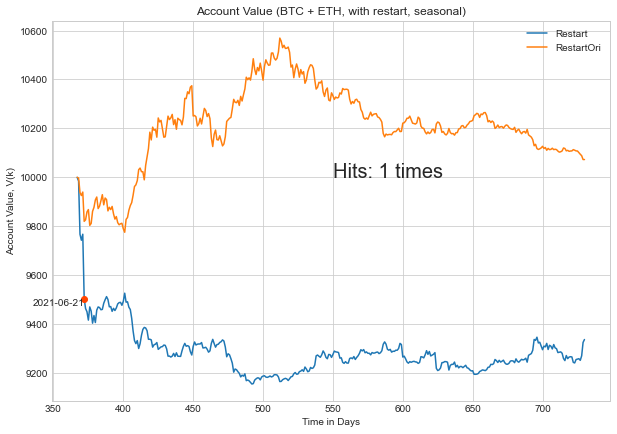

In [341]:
# Portfolio

Vk_data_re_1 = pd.DataFrame()
Vk_data_re_1 = Vk_data_re_1.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_1 = Vk_data_re_1.assign(Restart = V_all1)

Vk_data_ori_1 = pd.DataFrame()
Vk_data_ori_1 = Vk_data_ori_1.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_ori_1 = Vk_data_ori_1.assign(RestartOri = V_ori1)

print(Vk_data_re_1.head(5))
print(Vk_data_re_1.tail(5))

print('最後一天的帳戶餘額:', V_all1[-1])
return_quarter = (V_all1[-1]-V_start) / V_start
print('Return:', return_quarter)
sd_quarter = float(Vk_data_re_1['Restart'].std())
print('SD:', sd_quarter)
print('Sharpe Ratio:', (return_quarter/sd_quarter) * math.sqrt(Y2))

Vk_data_re_1['Restart'].plot(title = "Account Value (BTC + ETH, with restart, seasonal)")
Vk_data_ori_1['RestartOri'].plot()
plt.legend()
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')

a = 'Hits: ' + str(len(hits1)) + ' times'
plt.text(550, 10000, a, fontsize = 20)

for a in hits1:
    hits1_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_day_index = hits1_day_index_l[0]
    plt.text(hits1_day_index, Vk_data_re_1['Restart'].iloc[hits1_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits1_day_index, Vk_data_re_1['Restart'].iloc[hits1_day_index-Y2_day0_index[0]], 'o', c='orangered')
for a in hits1_ori:
    hits1_ori_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_ori_day_index = hits1_ori_day_index_l[0]
    plt.text(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]], 'o', c='orangered')


fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTCETH_restart_quarter_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTCETH_restart_quarter_0.05.eps', format='eps', dpi=1000)
plt.show()

In [310]:
for a in hits1:
    hits1_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_day_index = hits1_day_index_l[0]
    print(a)
    for i in range(-7,8,1):
        print(i, round(Vk_data_re_1['Restart'].iloc[hits1_day_index-Y2_day0_index[0]]+i, 2), end = '|')
    print('\n')

2021-06-21
-7 9496.85|-6 9497.85|-5 9498.85|-4 9499.85|-3 9500.85|-2 9501.85|-1 9502.85|0 9503.85|1 9504.85|2 9505.85|3 9506.85|4 9507.85|5 9508.85|6 9509.85|7 9510.85|



# 半年

In [311]:
# Portfolio

delta = int(Y2 / 2)  # 自訂為half year
c = 0
V_start = 10000
V_all2 = [V_start]
hits2 = ['2021-06-16']
d_list2 = [0]

while len(V_all2) < Y2:  # 前提 Y2 == Y22!!
    hits2_last_index = (Prices_reset.index[Prices_reset['Date'] == hits2[-1]]).tolist()
    hits2_last_delta_index = [i-delta for i in hits2_last_index]
    H1 = str(Prices_reset['Date'][hits2_last_delta_index[0]])[:10]
    print(H1, hits2[-1])
    if c == 0:
        ri_1 = gamma_star
        ri_2 = gamma_star2
    else:
        ri_1 = GetGammaP(H1, hits2[-1], max_d, V_all2[-1])[1]
        ri_2 = GetGammaP(H1, hits2[-1], max_d, V_all2[-1])[3]
    print('gammas:', ri_1, ri_2)
    
    Vi_list, hit, di_list = RestartP(hits2[-1], '2022-06-14', ri_1, ri_2, max_d, ep, V_all2[-1])
    # RestartP(t, t1, gamma, gamma1, dmax, epsilon, V_start)
    
    V_all2 += Vi_list[1:]
    d_list2 += di_list[1:]
    print('最大跌幅:', max(d_list2), d_list2.index(max(d_list2)))
    print('帳戶餘額:', V_all2[-1])

    if hit != 0 and hit <= N:  # 前提 N == N2!!
        hittime = str(Prices_reset['Date'][hit])[:10]
        print(hittime)
        hits2.append(hittime)
    c += 1
    print(c)

hits2 = hits2[1:]
print(len(V_all2))
print('撞到限制的期數:', hits2)

2020-12-16 2021-06-16
gammas: 4.665292017113947 2.8873742279026486
最大跌幅: [0.02570636] 3
帳戶餘額: [9503.84532817]
2021-06-21
1
2020-12-21 2021-06-21


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:36: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:40: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))


gammas: 2.2276554602601086 2.954269592192809
最大跌幅: [0.04856476] 217
帳戶餘額: [10189.58231743]
2022-01-21
2
2021-07-23 2022-01-21
gammas: 4.450618899752888 2.055511768346145
最大跌幅: [0.04872744] 324
帳戶餘額: [10238.70449556]
2022-05-09
3
2021-11-08 2022-05-09
gammas: -2.785027989722228 -1.7947026982777938
最大跌幅: [0.04872744] 324
帳戶餘額: [10904.60030497]
4
364
撞到限制的期數: ['2021-06-21', '2022-01-21', '2022-05-09']


In [312]:
for i in range(len(V_all2)):
    V_all2[i] = float(V_all2[i])
    V_all2[i] = math.floor(V_all2[i] * 10000) / 10000.0
print(V_all2[1:3], V_all2[-3: -1])

[9984.7882, 9767.3196] [10500.9299, 10891.4201]


In [313]:
for i in range(len(d_list2)):
    d_list2[i] = float(d_list2[i])
print(max(d_list2), min(d_list2))

0.04872743789310049 0.0


# Portfolio

c_ori2 = 0  # 算跑幾輪

V_start = 10000
V_ori2 = [V_start]  # 原股價走勢（gamma = 1) -> for comparison

hits2_ori = ['2021-06-16']
d_list_ori = [0]  # collection of drawdowns

while len(V_ori2) < Y2:  # 前提 Y2 == Y22!!
    hits2_ori_last_index = (Prices_reset.index[Prices_reset['Date'] == hits2_ori[-1]]).tolist()
    hits2_ori_last_delta_index = [i-delta for i in hits2_ori_last_index]
    H1_ori = str(Prices_reset['Date'][hits2_ori_last_delta_index[0]])[:10]
    print(H1_ori, hits2_ori[-1])  # updated training window

    Vi_list_ori, hit_ori, di_list_ori = RestartP(hits2_ori[-1], '2022-06-14', 1, 1, max_d, ep, V_ori2[-1])
    
    V_ori2 += Vi_list_ori[1:]
    d_list_ori += di_list_ori[1:]
    
    print('最大跌幅(gamma = 1):', max(d_list_ori), d_list_ori.index(max(d_list_ori)))
    if hit_ori != 0 and hit_ori <= N:  # 前提 N == N2!!
        hittime_ori = str(Prices_reset['Date'][hit_ori])[:10]
        print('撞到限制的期數(gamma = 1):', hittime_ori)
        hits2_ori.append(hittime_ori)
    c_ori2 += 1
    print(c_ori2)

hits2_ori = hits2_ori[1:]
print('=========================================')

print('帳戶餘額跑', len(V_ori2), '輪')
print('撞到限制的期數彙整(gamma = 1):', hits2_ori)

          Date     Restart
367 2021-06-16  10000.0000
368 2021-06-17   9984.7882
369 2021-06-18   9767.3196
370 2021-06-19   9742.9363
371 2021-06-20   9767.4111
          Date     Restart
726 2022-06-10  10285.2772
727 2022-06-11  10373.4445
728 2022-06-12  10500.9299
729 2022-06-13  10891.4201
730 2022-06-14  10904.6003
最後一天的帳戶餘額: 10904.6003
Return: 0.09046003000000001
SD: 271.4293302772341
Sharpe Ratio: 0.006358440975425472


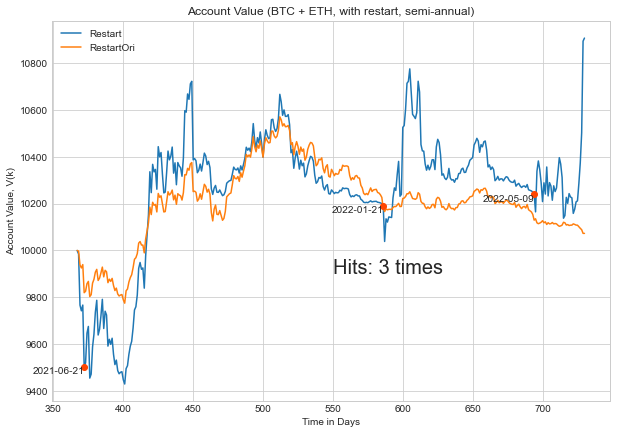

In [355]:
# Portfolio

Vk_data_re_2 = pd.DataFrame()
Vk_data_re_2 = Vk_data_re_2.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_2 = Vk_data_re_2.assign(Restart = V_all2)

print(Vk_data_re_2.head(5))
print(Vk_data_re_2.tail(5))

print('最後一天的帳戶餘額:', V_all2[-1])
return_quarter = (V_all2[-1]-V_start) / V_start
print('Return:', return_quarter)
sd_quarter = float(Vk_data_re_2['Restart'].std())
print('SD:', sd_quarter)
print('Sharpe Ratio:', (return_quarter/sd_quarter) * math.sqrt(Y2))

Vk_data_re_2['Restart'].plot(title = "Account Value (BTC + ETH, with restart, semi-annual)")
Vk_data_ori_1['RestartOri'].plot()
plt.legend()
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
a = 'Hits: ' + str(len(hits2)) + ' times'
plt.text(550, 9900, a, fontsize = 20)

for a in hits2:
    hits2_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits2_day_index = hits2_day_index_l[0]
    plt.text(hits2_day_index, Vk_data_re_2['Restart'].iloc[hits2_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits2_day_index, Vk_data_re_2['Restart'].iloc[hits2_day_index-Y2_day0_index[0]], 'o', c='orangered')
for a in hits1_ori:
    hits1_ori_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_ori_day_index = hits1_ori_day_index_l[0]
    plt.text(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]], 'o', c='orangered')


fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTCETH_restart_semi_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTCETH_restart_semi_0.05.eps', format='eps', dpi=1000)
plt.show()

In [316]:
for a in hits2:
    hits2_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits2_day_index = hits2_day_index_l[0]
    print(a)
    for i in range(-7,8,1):
        print(i, round(Vk_data_re_2['Restart'].iloc[hits2_day_index-Y2_day0_index[0]]+i, 2), end = '|')
    print('\n')

2021-06-21
-7 9496.85|-6 9497.85|-5 9498.85|-4 9499.85|-3 9500.85|-2 9501.85|-1 9502.85|0 9503.85|1 9504.85|2 9505.85|3 9506.85|4 9507.85|5 9508.85|6 9509.85|7 9510.85|

2022-01-21
-7 10182.58|-6 10183.58|-5 10184.58|-4 10185.58|-3 10186.58|-2 10187.58|-1 10188.58|0 10189.58|1 10190.58|2 10191.58|3 10192.58|4 10193.58|5 10194.58|6 10195.58|7 10196.58|

2022-05-09
-7 10231.7|-6 10232.7|-5 10233.7|-4 10234.7|-3 10235.7|-2 10236.7|-1 10237.7|0 10238.7|1 10239.7|2 10240.7|3 10241.7|4 10242.7|5 10243.7|6 10244.7|7 10245.7|



# 一月

In [317]:
# Portfolio

ep = 0.001
max_d = 0.05
delta = int(Y2 / 12)  # monthly
c = 0
V_start = 10000
V_all3 = [V_start]
hits3 = ['2021-06-16']
d_list3 = [0]

while len(V_all3) < Y2:  # 前提 Y2 == Y22!!
    hits3_last_index = (Prices_reset.index[Prices_reset['Date'] == hits3[-1]]).tolist()
    hits3_last_delta_index = [i-delta for i in hits3_last_index]
    H1 = str(Prices_reset['Date'][hits3_last_delta_index[0]])[:10]
    print(H1, hits3[-1])
    if c == 0:
        ri_1 = gamma_star
        ri_2 = gamma_star2
    else:
        ri_1 = GetGammaP(H1, hits3[-1], max_d, V_all3[-1])[1]
        ri_2 = GetGammaP(H1, hits3[-1], max_d, V_all3[-1])[3]
    print('gammas:', ri_1, ri_2)
    
    Vi_list, hit, di_list = RestartP(hits3[-1], '2022-06-14', ri_1, ri_2, max_d, ep, V_all3[-1])
    # RestartP(t, t1, gamma, gamma1, dmax, epsilon, V_start)
    
    V_all3 += Vi_list[1:]
    d_list3 += di_list[1:]
    print('最大跌幅:', max(d_list3), d_list3.index(max(d_list3)))
    print('帳戶餘額:', V_all3[-1])
    
    if hit != 0 and hit <= N:  # 前提 N == N2!!
        hittime = str(Prices_reset['Date'][hit])[:10]
        print(hittime)
        hits3.append(hittime)
    c += 1
    print(c)

hits3 = hits3[1:]
print(len(V_all3))
print('撞到限制的期數:', hits3)

2021-05-17 2021-06-16
gammas: 4.665292017113947 2.8873742279026486
最大跌幅: [0.02570636] 3
帳戶餘額: [9503.84532817]
2021-06-21
1
2021-05-22 2021-06-21


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:36: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:40: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))


gammas: 12.558517850819078 -2.2276101828302384
最大跌幅: [0.04853353] 32
帳戶餘額: [9510.72241797]
2021-07-20
2
2021-06-20 2021-07-20


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:88: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:92: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))


gammas: -3.5336469528061674 -1.9501413459111632
最大跌幅: [0.04885988] 56
帳戶餘額: [9043.84216607]
2021-08-20
3
2021-07-21 2021-08-20


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:101: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:49: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)


gammas: 9.263276181975709 8.640450421700976
最大跌幅: [0.04885988] 56
帳戶餘額: [8171.33764309]
2021-09-07
4
2021-08-08 2021-09-07
gammas: 8.661653014166008 5.435481877178452
最大跌幅: [0.04885988] 56
帳戶餘額: [7699.52699415]
2021-09-20
5
2021-08-21 2021-09-20
gammas: -3.4759028669066936 5.416202909212837
最大跌幅: [0.04885988] 56
帳戶餘額: [7748.3642753]
2022-05-26
6
2022-04-26 2022-05-26
gammas: -11.391338876805193 -7.972476378211077
最大跌幅: [0.04885988] 56
帳戶餘額: [7473.00925395]
2022-05-30
7
2022-04-30 2022-05-30
gammas: -5.22939819623471 -5.814040925406831
最大跌幅: [0.04885988] 56
帳戶餘額: [9153.73333571]
8
364
撞到限制的期數: ['2021-06-21', '2021-07-20', '2021-08-20', '2021-09-07', '2021-09-20', '2022-05-26', '2022-05-30']


In [318]:
for i in range(len(V_all3)):
    V_all3[i] = float(V_all3[i])
    V_all3[i] = math.floor(V_all3[i] * 10000) / 10000.0
print(V_all3[1:3], V_all3[-3: -1])

[9984.7882, 9767.3196] [8383.5674, 9139.5308]


In [319]:
for i in range(len(d_list3)):
    d_list3[i] = float(d_list3[i])
print(max(d_list3), min(d_list3))

0.048859883409359574 0.0


          Date     Restart
367 2021-06-16  10000.0000
368 2021-06-17   9984.7882
369 2021-06-18   9767.3196
370 2021-06-19   9742.9363
371 2021-06-20   9767.4111
372 2021-06-21   9503.8453
373 2021-06-22   9667.5838
374 2021-06-23   9829.0091
375 2021-06-24  10001.6414
376 2021-06-25   9551.7945
          Date    Restart
721 2022-06-05  7779.9693
722 2022-06-06  7633.6506
723 2022-06-07  7668.0218
724 2022-06-08  7719.0416
725 2022-06-09  7727.3785
726 2022-06-10  7895.2748
727 2022-06-11  8133.2056
728 2022-06-12  8383.5674
729 2022-06-13  9139.5308
730 2022-06-14  9153.7333
最後一天的帳戶餘額: 9153.7333
Return: -0.08462667000000001
SD: 630.7076075023111
Sharpe Ratio: -0.0025599405188109956


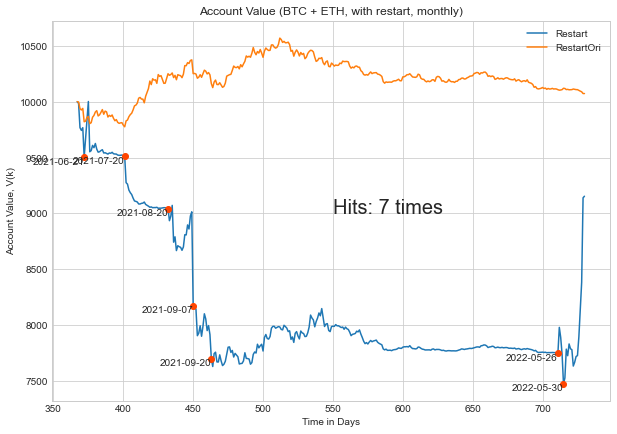

In [342]:
# Portfolio

Vk_data_re_3 = pd.DataFrame()
Vk_data_re_3 = Vk_data_re_3.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_3 = Vk_data_re_3.assign(Restart = V_all3)

print(Vk_data_re_3.head(10))
print(Vk_data_re_3.tail(10))

print('最後一天的帳戶餘額:', V_all3[-1])
return_month = (V_all3[-1]-V_start) / V_start
print('Return:', return_month)
sd_month = float(Vk_data_re_3['Restart'].std())
print('SD:', sd_month)
print('Sharpe Ratio:', (return_month/sd_month) * math.sqrt(Y2))

Vk_data_re_3['Restart'].plot(title = "Account Value (BTC + ETH, with restart, monthly)")
Vk_data_ori_1['RestartOri'].plot()
plt.legend()
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
a = 'Hits: ' + str(len(hits3)) + ' times'
plt.text(550, 9000, a, fontsize = 20)

for a in hits3:
    hits3_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits3_day_index = hits3_day_index_l[0]
    plt.text(hits3_day_index, Vk_data_re_3['Restart'].iloc[hits3_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits3_day_index, Vk_data_re_3['Restart'].iloc[hits3_day_index-Y2_day0_index[0]], 'o', c='orangered')
for a in hits1_ori:
    hits1_ori_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_ori_day_index = hits1_ori_day_index_l[0]
    plt.text(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]], 'o', c='orangered')

fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTCETH_restart_month_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTCETH_restart_month_0.05.eps', format='eps', dpi=1000)
plt.show()

In [322]:
for a in hits3:
    hits3_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits3_day_index = hits3_day_index_l[0]
    print(a)
    for i in range(-7,8,1):
        print(i, round(Vk_data_re_3['Restart'].iloc[hits3_day_index-Y2_day0_index[0]]+i, 2), end = '|')
    print('\n')

2021-06-21
-7 9496.85|-6 9497.85|-5 9498.85|-4 9499.85|-3 9500.85|-2 9501.85|-1 9502.85|0 9503.85|1 9504.85|2 9505.85|3 9506.85|4 9507.85|5 9508.85|6 9509.85|7 9510.85|

2021-07-20
-7 9503.72|-6 9504.72|-5 9505.72|-4 9506.72|-3 9507.72|-2 9508.72|-1 9509.72|0 9510.72|1 9511.72|2 9512.72|3 9513.72|4 9514.72|5 9515.72|6 9516.72|7 9517.72|

2021-08-20
-7 9036.84|-6 9037.84|-5 9038.84|-4 9039.84|-3 9040.84|-2 9041.84|-1 9042.84|0 9043.84|1 9044.84|2 9045.84|3 9046.84|4 9047.84|5 9048.84|6 9049.84|7 9050.84|

2021-09-07
-7 8164.34|-6 8165.34|-5 8166.34|-4 8167.34|-3 8168.34|-2 8169.34|-1 8170.34|0 8171.34|1 8172.34|2 8173.34|3 8174.34|4 8175.34|5 8176.34|6 8177.34|7 8178.34|

2021-09-20
-7 7692.53|-6 7693.53|-5 7694.53|-4 7695.53|-3 7696.53|-2 7697.53|-1 7698.53|0 7699.53|1 7700.53|2 7701.53|3 7702.53|4 7703.53|5 7704.53|6 7705.53|7 7706.53|

2022-05-26
-7 7741.36|-6 7742.36|-5 7743.36|-4 7744.36|-3 7745.36|-2 7746.36|-1 7747.36|0 7748.36|1 7749.36|2 7750.36|3 7751.36|4 7752.36|5 7753.36|6 

# 兩週

In [323]:
# Portfolio

delta = 14  # 14 days
c = 0
V_start = 10000
V_all4 = [V_start]
hits4 = ['2021-06-16']
d_list4 = [0]
ep = 0.001
max_d = 0.05

while len(V_all4) < Y2:  # 前提 Y2 == Y22!!
    hits4_last_index = (Prices_reset.index[Prices_reset['Date'] == hits4[-1]]).tolist()
    hits4_last_delta_index = [i-delta for i in hits4_last_index]
    H1 = str(Prices_reset['Date'][hits4_last_delta_index[0]])[:10]
    print(H1, hits4[-1])
    if c == 0:
        ri_1 = gamma_star
        ri_2 = gamma_star2
    else:
        ri_1 = GetGammaP(H1, hits4[-1], max_d, V_all4[-1])[1]
        ri_2 = GetGammaP(H1, hits4[-1], max_d, V_all4[-1])[3]
    print('gammas:', ri_1, ri_2)
    
    Vi_list, hit, di_list = RestartP(hits4[-1], '2022-06-14', ri_1, ri_2, max_d, ep, V_all4[-1])
    # RestartP(t, t1, gamma, gamma1, dmax, epsilon, V_start)
    
    V_all4 += Vi_list[1:]
    d_list4 += di_list[1:]
    print('最大跌幅:', max(d_list4), d_list4.index(max(d_list4)))
    print('帳戶餘額:', V_all4[-1])

    if hit != 0 and hit <= N:  # 前提 N == N2!!
        hittime = str(Prices_reset['Date'][hit])[:10]
        print(hittime)
        hits4.append(hittime)
    c += 1
    print(c)

hits4 = hits4[1:]
print(len(V_all4))
print('撞到限制的期數:', hits4)

2021-06-02 2021-06-16
gammas: 4.665292017113947 2.8873742279026486
最大跌幅: [0.02570636] 3
帳戶餘額: [9503.84532817]
2021-06-21
1
2021-06-07 2021-06-21


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:88: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:92: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:101: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)


gammas: 13.109864230806382 -7.501771717500226
最大跌幅: [0.04898578] 83
帳戶餘額: [9401.91242419]
2021-09-21
2
2021-09-07 2021-09-21


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:36: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:40: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:49: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)


gammas: -6.94741277342405 -6.6308349452960815
最大跌幅: [0.04898578] 83
帳戶餘額: [8817.27969918]
2021-09-22
3
2021-09-08 2021-09-22
gammas: -7.188224386687462 -6.636354236207168
最大跌幅: [0.04898578] 83
帳戶餘額: [8525.97443979]
2021-10-01
4
2021-09-17 2021-10-01
gammas: -5.954250366413534 -4.2543375196366435
最大跌幅: [0.04898578] 83
帳戶餘額: [8106.81614974]
2021-10-20
5
2021-10-06 2021-10-20
gammas: 12.274783070595749 13.281053572528212
最大跌幅: [0.04898578] 83
帳戶餘額: [7689.93082347]
2021-10-21
6
2021-10-07 2021-10-21
gammas: 32.68122398877871 18.033530769131588
最大跌幅: [0.04898578] 83
帳戶餘額: [7239.42894776]
2021-10-22
7
2021-10-08 2021-10-22
gammas: 15.863659170947399 7.356183138453565
最大跌幅: [0.04898578] 83
帳戶餘額: [7173.29486861]
2021-11-16
8
2021-11-02 2021-11-16
gammas: 9.359387144135965 47.18022081918553
最大跌幅: [0.04898578] 83
帳戶餘額: [6092.86609987]
2021-11-18
9
2021-11-04 2021-11-18
gammas: -6.139806426674808 -5.996989861883815
最大跌幅: [0.04898578] 83
帳戶餘額: [5775.36219005]
2022-02-04
10
2022-01-21 2022-02-04
ga

In [324]:
for i in range(len(V_all4)):
    V_all4[i] = float(V_all4[i])
    V_all4[i] = math.floor(V_all4[i] * 10000) / 10000.0
print(V_all4[1:3], V_all4[-3: -1])

[9984.7882, 9767.3196] [5113.7563, 5119.8164]


In [325]:
for i in range(len(d_list4)):
    d_list4[i] = float(d_list4[i])
print(max(d_list4), min(d_list4))

0.048985783899672244 0.0


          Date     Restart
367 2021-06-16  10000.0000
368 2021-06-17   9984.7882
369 2021-06-18   9767.3196
370 2021-06-19   9742.9363
371 2021-06-20   9767.4111
372 2021-06-21   9503.8453
373 2021-06-22   9692.3531
374 2021-06-23   9707.7208
375 2021-06-24   9887.3246
376 2021-06-25   9648.6176
          Date    Restart
721 2022-06-05  5004.2670
722 2022-06-06  5023.9183
723 2022-06-07  5042.4519
724 2022-06-08  5022.0268
725 2022-06-09  5020.7289
726 2022-06-10  5055.1989
727 2022-06-11  5115.4256
728 2022-06-12  5113.7563
729 2022-06-13  5119.8164
730 2022-06-14  5099.8248
最後一天的帳戶餘額: 5099.8248
Return: -0.49001752
SD: 1880.5993380400741
Sharpe Ratio: -0.0049712547723884315


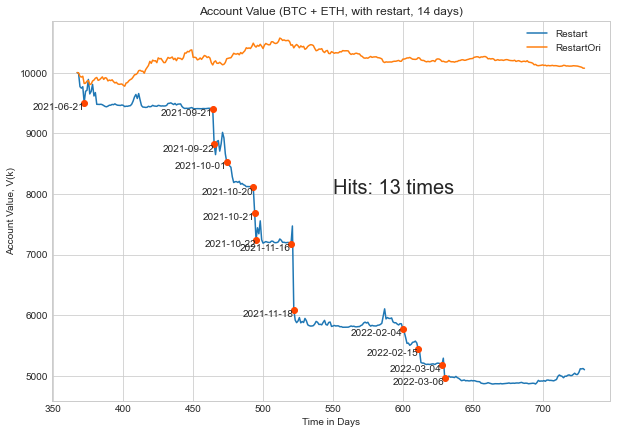

In [343]:
# Portfolio

Vk_data_re_4 = pd.DataFrame()
Vk_data_re_4 = Vk_data_re_4.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_4 = Vk_data_re_4.assign(Restart = V_all4)

print(Vk_data_re_4.head(10))
print(Vk_data_re_4.tail(10))

print('最後一天的帳戶餘額:', V_all4[-1])
return_14 = (V_all4[-1]-V_start) / V_start
print('Return:', return_14)
sd_14 = float(Vk_data_re_4['Restart'].std())
print('SD:', sd_14)
print('Sharpe Ratio:', (return_14/sd_14) * math.sqrt(Y2))

Vk_data_re_4['Restart'].plot(title = "Account Value (BTC + ETH, with restart, 14 days)")
Vk_data_ori_1['RestartOri'].plot()
plt.legend()
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
a = 'Hits: ' + str(len(hits4)) + ' times'
plt.text(550, 8000, a, fontsize = 20)

for a in hits4:
    hits4_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits4_day_index = hits4_day_index_l[0]
    plt.text(hits4_day_index, Vk_data_re_4['Restart'].iloc[hits4_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits4_day_index, Vk_data_re_4['Restart'].iloc[hits4_day_index-Y2_day0_index[0]], 'o', c='orangered')
for a in hits1_ori:
    hits1_ori_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_ori_day_index = hits1_ori_day_index_l[0]
    plt.text(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]], 'o', c='orangered')


fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTCETH_restart_14d_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTCETH_restart_14d_0.05.eps', format='eps', dpi=1000)
plt.show()

In [328]:
for a in hits4:
    hits4_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits4_day_index = hits4_day_index_l[0]
    print(a)
    for i in range(-7,8,1):
        print(i, round(Vk_data_re_4['Restart'].iloc[hits4_day_index-Y2_day0_index[0]]+i, 2), end = '|')
    print('\n')

2021-06-21
-7 9496.85|-6 9497.85|-5 9498.85|-4 9499.85|-3 9500.85|-2 9501.85|-1 9502.85|0 9503.85|1 9504.85|2 9505.85|3 9506.85|4 9507.85|5 9508.85|6 9509.85|7 9510.85|

2021-09-21
-7 9394.91|-6 9395.91|-5 9396.91|-4 9397.91|-3 9398.91|-2 9399.91|-1 9400.91|0 9401.91|1 9402.91|2 9403.91|3 9404.91|4 9405.91|5 9406.91|6 9407.91|7 9408.91|

2021-09-22
-7 8810.28|-6 8811.28|-5 8812.28|-4 8813.28|-3 8814.28|-2 8815.28|-1 8816.28|0 8817.28|1 8818.28|2 8819.28|3 8820.28|4 8821.28|5 8822.28|6 8823.28|7 8824.28|

2021-10-01
-7 8518.97|-6 8519.97|-5 8520.97|-4 8521.97|-3 8522.97|-2 8523.97|-1 8524.97|0 8525.97|1 8526.97|2 8527.97|3 8528.97|4 8529.97|5 8530.97|6 8531.97|7 8532.97|

2021-10-20
-7 8099.82|-6 8100.82|-5 8101.82|-4 8102.82|-3 8103.82|-2 8104.82|-1 8105.82|0 8106.82|1 8107.82|2 8108.82|3 8109.82|4 8110.82|5 8111.82|6 8112.82|7 8113.82|

2021-10-21
-7 7682.93|-6 7683.93|-5 7684.93|-4 7685.93|-3 7686.93|-2 7687.93|-1 7688.93|0 7689.93|1 7690.93|2 7691.93|3 7692.93|4 7693.93|5 7694.93|6 

# 10天

In [329]:
# Portfolio

delta = 10  # 10 days
c = 0
V_start = 10000
V_all5 = [V_start]
hits5 = ['2021-06-16']
d_list5 = [0]
ep = 0.001
max_d = 0.05

while len(V_all5) < Y2:  # 前提 Y2 == Y22!!
    hits5_last_index = (Prices_reset.index[Prices_reset['Date'] == hits5[-1]]).tolist()
    hits5_last_delta_index = [i-delta for i in hits5_last_index]
    H1 = str(Prices_reset['Date'][hits5_last_delta_index[0]])[:10]
    print(H1, hits5[-1])
    if c == 0:
        ri_1 = gamma_star
        ri_2 = gamma_star2
    else:
        ri_1 = GetGammaP(H1, hits5[-1], max_d, V_all5[-1])[1]
        ri_2 = GetGammaP(H1, hits5[-1], max_d, V_all5[-1])[3]
    print('gammas:', ri_1, ri_2)
    
    Vi_list, hit, di_list = RestartP(hits5[-1], '2022-06-14', ri_1, ri_2, max_d, ep, V_all5[-1])    
    V_all5 += Vi_list[1:]
    d_list5 += di_list[1:]
    print('最大跌幅:', max(d_list5), d_list5.index(max(d_list5)))
    print('帳戶餘額:', V_all5[-1])
    
    if hit != 0 and hit <= N:  # 前提 N == N2!!
        hittime = str(Prices_reset['Date'][hit])[:10]
        print(hittime)
        hits5.append(hittime)
    c += 1
    print(c)

hits5 = hits5[1:]
print(len(V_all5))
print('撞到限制的期數:', hits5)

2021-06-06 2021-06-16
gammas: 4.665292017113947 2.8873742279026486
最大跌幅: [0.02570636] 3
帳戶餘額: [9503.84532817]
2021-06-21
1
2021-06-11 2021-06-21


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:88: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:92: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:101: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)


gammas: -9.59760116149613 -5.864708357628999
最大跌幅: [0.0418033] 7
帳戶餘額: [8997.91787524]
2021-06-27
2
2021-06-17 2021-06-27


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:36: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:40: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/830759518.py:49: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)


gammas: -12.694431828824028 -15.425168197499682
最大跌幅: [0.0418033] 7
帳戶餘額: [8530.85114607]
2021-06-29
3
2021-06-19 2021-06-29
gammas: -6.653826442693771 -11.264469636654665
最大跌幅: [0.04677738] 17
帳戶餘額: [7928.27721421]
2021-07-21
4
2021-07-11 2021-07-21
gammas: -25.9548611634212 -13.171918504774787
最大跌幅: [0.04677738] 17
帳戶餘額: [7370.72111603]
2021-07-23
5
2021-07-13 2021-07-23
gammas: 27.51156166669731 12.071192192711475
最大跌幅: [0.04899528] 42
帳戶餘額: [10436.82882174]
2021-08-03
6
2021-07-24 2021-08-03
gammas: 13.251588184058939 50.29573326804538
最大跌幅: [0.04899528] 42
帳戶餘額: [17411.09516447]
2021-08-08
7
2021-07-29 2021-08-08
gammas: 8.86447302144093 14.368307119248916
最大跌幅: [0.04899528] 42
帳戶餘額: [17583.16374771]
2021-08-17
8
2021-08-07 2021-08-17
gammas: 30.014298411384218 21.179605200645746
最大跌幅: [0.04899528] 42
帳戶餘額: [20173.13157818]
2021-08-24
9
2021-08-14 2021-08-24
gammas: 11.341564575746418 20.476259769301244
最大跌幅: [0.04899528] 42
帳戶餘額: [19505.53194076]
2021-08-26
10
2021-08-16 2021-08-

In [330]:
for i in range(len(V_all5)):
    V_all5[i] = float(V_all5[i])
    V_all5[i] = math.floor(V_all5[i] * 10000) / 10000.0
print(V_all5[1:3], V_all5[-3: -1])

[9984.7882, 9767.3196] [10823.6825, 10796.233]


In [331]:
for i in range(len(d_list5)):
    d_list5[i] = float(d_list5[i])
print(max(d_list5), min(d_list5))

0.048995279152399984 0.0


          Date     Restart
367 2021-06-16  10000.0000
368 2021-06-17   9984.7882
369 2021-06-18   9767.3196
370 2021-06-19   9742.9363
371 2021-06-20   9767.4111
372 2021-06-21   9503.8453
373 2021-06-22   9404.4121
374 2021-06-23   9134.4359
375 2021-06-24   9106.5532
376 2021-06-25   9212.0563
          Date     Restart
721 2022-06-05  10823.4204
722 2022-06-06  10837.0804
723 2022-06-07  10841.4776
724 2022-06-08  10825.9468
725 2022-06-09  10824.9373
726 2022-06-10  10827.8398
727 2022-06-11  10838.7967
728 2022-06-12  10823.6825
729 2022-06-13  10796.2330
730 2022-06-14  10871.5069
最後一天的帳戶餘額: 10871.5069
Return: 0.08715069000000003
SD: 3022.4072905706294
Sharpe Ratio: 0.0005501340595683891


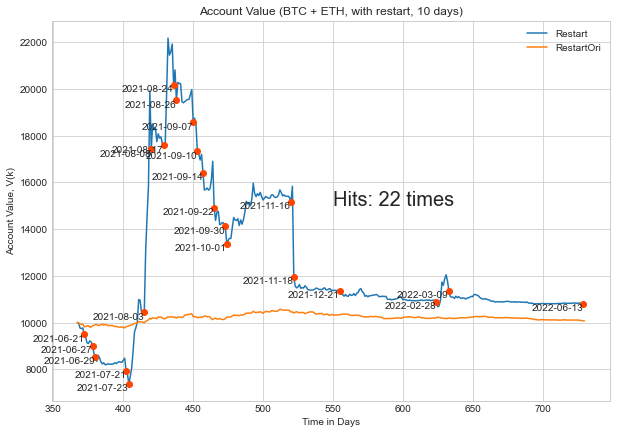

In [344]:
# Portfolio

Vk_data_re_5 = pd.DataFrame()
Vk_data_re_5 = Vk_data_re_5.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_5 = Vk_data_re_5.assign(Restart = V_all5)

print(Vk_data_re_5.head(10))
print(Vk_data_re_5.tail(10))

print('最後一天的帳戶餘額:', V_all5[-1])
return_10 = (V_all5[-1]-V_start) / V_start
print('Return:', return_10)
sd_10 = float(Vk_data_re_5['Restart'].std())
print('SD:', sd_10)
print('Sharpe Ratio:', (return_10/sd_10) * math.sqrt(Y2))

Vk_data_re_5['Restart'].plot(title = "Account Value (BTC + ETH, with restart, 10 days)")
Vk_data_ori_1['RestartOri'].plot()
plt.legend()
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
a = 'Hits: ' + str(len(hits5)) + ' times'
plt.text(550, 15000, a, fontsize = 20)

for a in hits5:
    hits5_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits5_day_index = hits5_day_index_l[0]
    plt.text(hits5_day_index, Vk_data_re_5['Restart'].iloc[hits5_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits5_day_index, Vk_data_re_5['Restart'].iloc[hits5_day_index-Y2_day0_index[0]], 'o', c='orangered')
for a in hits1_ori:
    hits1_ori_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_ori_day_index = hits1_ori_day_index_l[0]
    plt.text(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]], 'o', c='orangered')


fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTCETH_restart_10d_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTCETH_restart_10d_0.05.eps', format='eps', dpi=1000)
plt.show()

In [276]:
for a in hits5:
    hits5_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits5_day_index = hits5_day_index_l[0]
    print(a)
    for i in range(-7,8,1):
        print(i, round(Vk_data_re_5['Restart'].iloc[hits5_day_index-Y2_day0_index[0]]+i, 2), end = '|')
    print('\n')

2022-01-21
-7 9846.25|-6 9847.25|-5 9848.25|-4 9849.25|-3 9850.25|-2 9851.25|-1 9852.25|0 9853.25|1 9854.25|2 9855.25|3 9856.25|4 9857.25|5 9858.25|6 9859.25|7 9860.25|



In [347]:
# Portfolio

delta = 7  # 7 days
c = 0
V_start = 10000
V_all6 = [V_start]
hits6 = ['2021-06-16']
d_list6 = [0]
ep = 0.001
max_d = 0.05

while len(V_all6) < Y2:  # 前提 Y2 == Y22!!
    hits6_last_index = (Prices_reset.index[Prices_reset['Date'] == hits6[-1]]).tolist()
    hits6_last_delta_index = [i-delta for i in hits6_last_index]
    H1 = str(Prices_reset['Date'][hits6_last_delta_index[0]])[:10]
    print(H1, hits6[-1])
    if c == 0:
        ri_1 = gamma_star
        ri_2 = gamma_star2
    else:
        ri_1 = GetGammaP(H1, hits6[-1], max_d, V_all6[-1])[1]
        ri_2 = GetGammaP(H1, hits6[-1], max_d, V_all6[-1])[3]
    print('gammas:', ri_1, ri_2)
    
    Vi_list, hit, di_list = RestartP(hits6[-1], '2022-06-14', ri_1, ri_2, max_d, ep, V_all6[-1])
    # RestartP(t, t1, gamma, gamma1, dmax, epsilon, V_start)
    
    V_all6 += Vi_list[1:]
    d_list6 += di_list[1:]
    print('最大跌幅:', max(d_list6), d_list6.index(max(d_list6)))
    print('帳戶餘額:', V_all6[-1])
    
    if hit != 0 and hit <= N:  # 前提 N == N2!!
        hittime = str(Prices_reset['Date'][hit])[:10]
        print(hittime)
        hits6.append(hittime)
    c += 1
    print(c)

hits6 = hits6[1:]
print(len(V_all6))
print('撞到限制的期數:', hits6)

2021-06-09 2021-06-16
gammas: 4.665292017113947 2.8873742279026486
最大跌幅: [0.02570636] 3
帳戶餘額: [9503.84532817]
2021-06-21
1
2021-06-14 2021-06-21


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/3459006931.py:103: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/3459006931.py:90: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/3459006931.py:94: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/3459006931.py:37: RuntimeWarning: divide by zero encountered in true_divide
  Mk = (dmax-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/3459006931.py:41: RuntimeWarning: invalid value encountered in multiply
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_10894/3459006931.py:50: RuntimeWarning: divide by zero encountered in log
  Ji = np.log(Vk/V_start)


gammas: -13.6573508449701 -20.333365296080764
最大跌幅: [0.02570636] 3
帳戶餘額: [8745.47994929]
2021-06-23
2
2021-06-16 2021-06-23
gammas: -21.42456810879415 -25.322156871716178
最大跌幅: [0.02975928] 8
帳戶餘額: [8274.37238486]
2021-06-27
3
2021-06-20 2021-06-27
gammas: -21.003855251543165 -13.923877045538038
最大跌幅: [0.02975928] 8
帳戶餘額: [7787.85922154]
2021-06-29
4
2021-06-22 2021-06-29
gammas: 7.837380100668609 4.071993188622612
最大跌幅: [0.04883252] 30
帳戶餘額: [7627.11101106]
2021-09-07
5
2021-08-31 2021-09-07
gammas: 434.03543726186996 26.99397386624777
最大跌幅: [0.04883252] 30
帳戶餘額: [5295.22788533]
2021-09-08
6
2021-09-01 2021-09-08
gammas: -22.868319021178603 2.9182907335744055
最大跌幅: [0.04883252] 30
帳戶餘額: [5094.45082077]
2021-09-18
7
2021-09-11 2021-09-18
gammas: 12.71256459699087 6.965206224486028
最大跌幅: [0.04883252] 30
帳戶餘額: [4711.26042397]
2021-09-20
8
2021-09-13 2021-09-20
gammas: 32.01775755885318 -3.934748222501751
最大跌幅: [0.04883252] 30
帳戶餘額: [4393.69865363]
2021-09-21
9
2021-09-14 2021-09-21
gamma

In [348]:
for i in range(len(V_all6)):
    V_all6[i] = float(V_all6[i])
    V_all6[i] = math.floor(V_all6[i] * 10000) / 10000.0
print(V_all6[1:3], V_all6[-3: -1])

[9984.7882, 9767.3196] [876.7421, 888.0718]


In [349]:
for i in range(len(d_list6)):
    d_list6[i] = float(d_list6[i])
print(max(d_list6), min(d_list6))

0.048999213993312245 0.0


          Date     Restart
367 2021-06-16  10000.0000
368 2021-06-17   9984.7882
369 2021-06-18   9767.3196
370 2021-06-19   9742.9363
371 2021-06-20   9767.4111
372 2021-06-21   9503.8453
373 2021-06-22   9403.0677
374 2021-06-23   8745.4799
375 2021-06-24   8491.6309
376 2021-06-25   9243.8771
          Date   Restart
721 2022-06-05  850.6650
722 2022-06-06  852.8719
723 2022-06-07  856.1756
724 2022-06-08  852.2847
725 2022-06-09  852.1075
726 2022-06-10  858.6619
727 2022-06-11  874.8624
728 2022-06-12  876.7421
729 2022-06-13  888.0718
730 2022-06-14  875.6040
最後一天的帳戶餘額: 875.604
Return: -0.9124396
SD: 2718.0225761829765
Sharpe Ratio: -0.00640474373533387


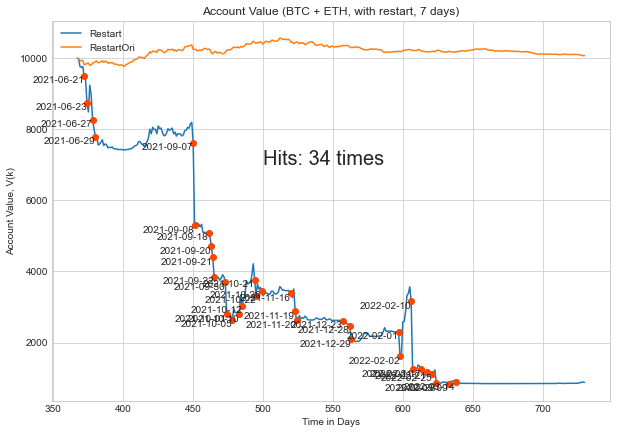

In [353]:
# Portfolio

Vk_data_re_6 = pd.DataFrame()
Vk_data_re_6 = Vk_data_re_6.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_6 = Vk_data_re_6.assign(Restart = V_all6)

print(Vk_data_re_6.head(10))
print(Vk_data_re_6.tail(10))

print('最後一天的帳戶餘額:', V_all6[-1])
return_7 = (V_all6[-1]-V_start) / V_start
print('Return:', return_7)
sd_7 = float(Vk_data_re_6['Restart'].std())
print('SD:', sd_7)
print('Sharpe Ratio:', (return_7/sd_7) * math.sqrt(Y2))

Vk_data_re_6['Restart'].plot(title = "Account Value (BTC + ETH, with restart, 7 days)")
Vk_data_ori_1['RestartOri'].plot()
plt.legend()
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
a6 = 'Hits: ' + str(len(hits6)) + ' times'
plt.text(500, 7000, a6, fontsize = 20)

for a in hits6:
    hits6_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits6_day_index = hits6_day_index_l[0]
    plt.text(hits6_day_index, Vk_data_re_6['Restart'].iloc[hits6_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits6_day_index, Vk_data_re_6['Restart'].iloc[hits6_day_index-Y2_day0_index[0]], 'o', c='orangered')
for a in hits1_ori:
    hits1_ori_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits1_ori_day_index = hits1_ori_day_index_l[0]
    plt.text(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]],
             a, fontsize = 10, rotation = 0, ha = 'right', va = 'top')
    plt.plot(hits1_ori_day_index, Vk_data_ori_1['RestartOri'].iloc[hits1_ori_day_index-Y2_day0_index[0]], 'o', c='orangered')


fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTCETH_restart_7d_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTCETH_restart_7d_0.05.eps', format='eps', dpi=1000)
plt.show()

In [351]:
for a in hits6:
    hits6_day_index_l = (Prices_reset.index[Prices_reset['Date'] == a]).tolist()
    hits6_day_index = hits6_day_index_l[0]
    print(a)
    for i in range(-7,8,1):
        print(i, round(Vk_data_re_6['Restart'].iloc[hits6_day_index-Y2_day0_index[0]]+i, 2), end = '|')
    print('\n')

2021-06-21
-7 9496.85|-6 9497.85|-5 9498.85|-4 9499.85|-3 9500.85|-2 9501.85|-1 9502.85|0 9503.85|1 9504.85|2 9505.85|3 9506.85|4 9507.85|5 9508.85|6 9509.85|7 9510.85|

2021-06-23
-7 8738.48|-6 8739.48|-5 8740.48|-4 8741.48|-3 8742.48|-2 8743.48|-1 8744.48|0 8745.48|1 8746.48|2 8747.48|3 8748.48|4 8749.48|5 8750.48|6 8751.48|7 8752.48|

2021-06-27
-7 8267.37|-6 8268.37|-5 8269.37|-4 8270.37|-3 8271.37|-2 8272.37|-1 8273.37|0 8274.37|1 8275.37|2 8276.37|3 8277.37|4 8278.37|5 8279.37|6 8280.37|7 8281.37|

2021-06-29
-7 7780.86|-6 7781.86|-5 7782.86|-4 7783.86|-3 7784.86|-2 7785.86|-1 7786.86|0 7787.86|1 7788.86|2 7789.86|3 7790.86|4 7791.86|5 7792.86|6 7793.86|7 7794.86|

2021-09-07
-7 7620.11|-6 7621.11|-5 7622.11|-4 7623.11|-3 7624.11|-2 7625.11|-1 7626.11|0 7627.11|1 7628.11|2 7629.11|3 7630.11|4 7631.11|5 7632.11|6 7633.11|7 7634.11|

2021-09-08
-7 5288.23|-6 5289.23|-5 5290.23|-4 5291.23|-3 5292.23|-2 5293.23|-1 5294.23|0 5295.23|1 5296.23|2 5297.23|3 5298.23|4 5299.23|5 5300.23|6 

#########################################

print((Prices.index[Prices['Date'] == hits[-1]]).tolist())

return_for_Prices.loc['2021-04-16':'2021-05-12'].max()

In [261]:
# Bitcoin

c = 0
V_start = 10000
V_all1 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all1) < Y2:
    hits_last_index = (Prices_reset.index[Prices_reset['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
    H1 = str(Prices_reset['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        print(hits[-1])
        ri = GetGamma(H1, hits[-1], max_d, V_all1[-1])[1]
    print(ri)
    Vi_list, hit, di_list = Restart(hits[-1], '2022-04-14', ri, max_d, ep, V_all1[-1])  # 索引日期.tolist()=[]問題
    V_all1 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    if hit != 0 and hit <= N:
        hittime = str(Prices_reset['Date'][hit])[:10]
        print(hittime)
        hits.append(hittime)
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all1))
print('撞到限制的期數:', hits)

2021-01-15 2021-04-16
6.251440917651317
最大跌幅: 0.04056633223449135 9
2021-05-12
1
2021-02-10 2021-05-12
2021-05-12
2.9616672537638387
最大跌幅: 0.044581706053296366 280
2
364
撞到限制的期數: ['2021-05-12']


          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17   9954.871822
369 2021-04-18   9745.521273
370 2021-04-19   9732.090513
371 2021-04-20   9751.586224
372 2021-04-21   9680.096792
373 2021-04-22   9635.321764
374 2021-04-23   9624.394423
375 2021-04-24   9608.523253
376 2021-04-25   9594.336678
最後一天的帳戶餘額: 9126.47247970707
Return: -0.08735275202929296
SD: 155.55088219859027
Sharpe Ratio: -0.0005615702771635236


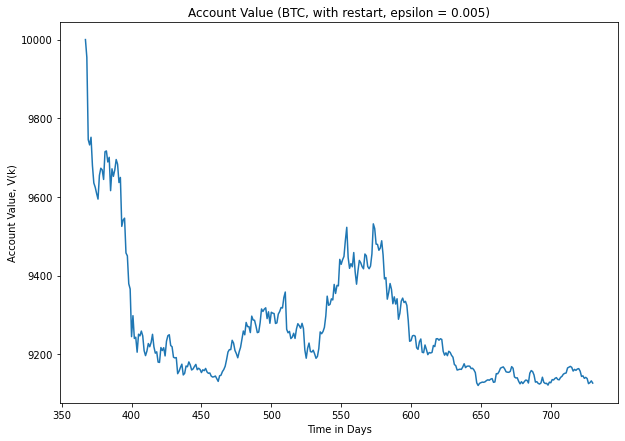

In [279]:
# Bitcoin

Vk_data_re_1 = pd.DataFrame()
Vk_data_re_1 = Vk_data_re_1.assign(Date = Prices_reset['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_1 = Vk_data_re_1.assign(Restart = V_all1)

print(Vk_data_re_1.head(10))
print('最後一天的帳戶餘額:', V_all1[-1])
return_quarter = (V_all1[-1]-V_start) / V_start
print('Return:', return_quarter)
sd_quarter = float(Vk_data_re_1['Restart'].std())
print('SD:', sd_quarter)
print('Sharpe Ratio:', return_quarter/sd_quarter)

Vk_data_re_1['Restart'].plot(title = "Account Value (BTC, with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTC_restart_quarter_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_restart_quarter_0.05.eps', format='eps', dpi=1000)
plt.show()

In [42]:
# Tether

c = 0
V_start = 10000
V_all1 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all1) < Y22:
    hits_last_index = (Prices2_reset.index[Prices2_reset['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
#     H1 = Prices.iloc[hits_last_delta_index]['Date']
    H1 = str(Prices2_reset['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        print(hits[-1])
        ri = GetGamma2(H1, hits[-1], max_d, V_all1[-1])[1]
    print(ri)
    Vi_list, hit, di_list = Restart2(hits[-1], '2022-04-14', ri, max_d, ep, V_all1[-1])  # 索引日期.tolist()=[]問題
    V_all1 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    if hit != 0 and hit <= N2:
        hittime = str(Prices2_reset['Date'][hit])[:10]
        print(hittime)
        hits.append(hittime)
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all1))
print('撞到限制的期數:', hits)

2021-01-15 2021-04-16
33.07750169964984
最大跌幅: 0.02077933077311242 248
1
364
撞到限制的期數: []


          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17  10151.554290
369 2021-04-18   9961.903722
370 2021-04-19   9959.391076
371 2021-04-20   9960.152961
372 2021-04-21   9960.089997
373 2021-04-22   9961.742320
374 2021-04-23   9962.499062
375 2021-04-24   9959.833675
376 2021-04-25   9960.095248
最後一天的帳戶餘額: 9950.49512347893
Return: -0.00495048765210704
SD: 11.945388782568184
Sharpe Ratio: -0.0004144266664079824


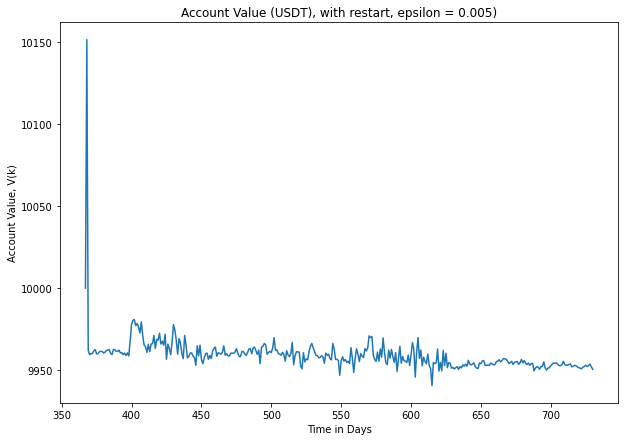

In [44]:
# 時間和帳戶餘額的關係

Vk_data_re_1 = pd.DataFrame()
Vk_data_re_1 = Vk_data_re_1.assign(Date = Prices2_reset['Date'].iloc[Y2_day0_index2[0]:])
Vk_data_re_1 = Vk_data_re_1.assign(Restart = V_all1)

print(Vk_data_re_1.head(10))
print('最後一天的帳戶餘額:', V_all1[-1])
return_quarter = (V_all1[-1]-V_start) / V_start
print('Return:', return_quarter)
sd_quarter = float(Vk_data_re_1['Restart'].std())
print('SD:', sd_quarter)
print('Sharpe Ratio:', return_quarter/sd_quarter)

Vk_data_re_1['Restart'].plot(title = "Account Value (USDT), with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_USDT_restart_quarter_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_USDT_restart_quarter_0.05.eps', format='eps', dpi=1000)
plt.show()

# 老方法：還沒改機率函數那邊

In [64]:
# 老方法
# J(gamma) = log[V(N)/V(0)] / N^2
# in-sample
# out-of-sample

def J(gamma):
    max_V = V_start
    Vk = V_start
    for k in range(sublen-1):
        dk = (max_V-Vk)/max_V
        Mk = (max_d-dk)/(1-dk)
        Vk1 = Vk * (1 + (gamma*Mk*float(return_for_Prices.iloc[k])))
        if Vk1 >= max_V:
            max_V = Vk1
        Vk = Vk1
    return math.log(Vk/V_start)/(sublen**2)

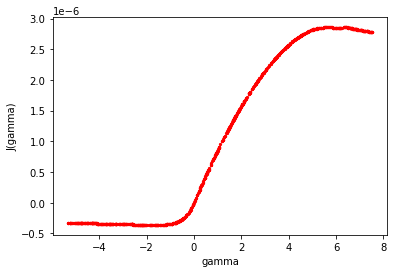

In [65]:
# 生成1000個區間內的gamma，區間來自前一年的資料

r_2_list = []
Jr_2_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma, max_gamma)
    r_2_list.append(r)
    Jr_2_list.append(J(r))

# 製作figure  
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(r_2_list, Jr_2_list, color='red', s=5)
plt.xlabel("gamma") 
plt.ylabel("J(gamma)")
fig = plt.gcf()
fig.savefig('gamma_2_BTC.pdf', format='pdf', dpi=1000)
fig.savefig('gamma_2_BTC.eps', format='eps', dpi=1000)
plt.show()

In [66]:
# 從模擬結果找最佳解

index_2 = Jr_2_list.index(max(Jr_2_list))
print('max J(r) =', max(Jr_2_list))
gamma_2_star = r_2_list[index_2]
print('gamma* = ', gamma_2_star)

max J(r) = 2.8582249771261637e-06
gamma* =  5.698188866339455


V_last (origin): 9500.007780310783
V_last (MC): 9500.089912509588
return (origin): -0.04999922196892167
return (MC): -0.04999100874904125


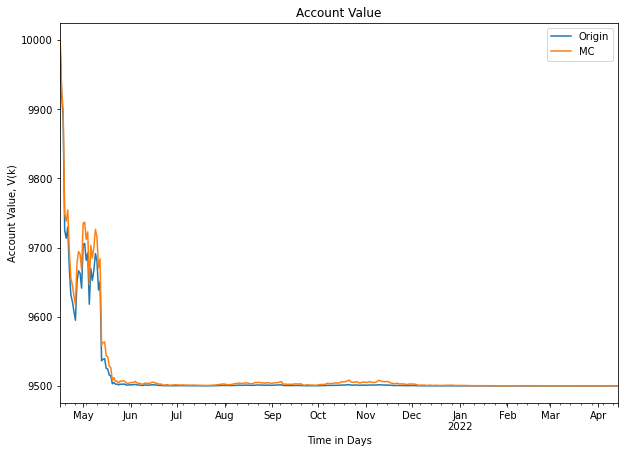

In [69]:
# Max Drawdown

Vk_2_list = [V_start]
max_2_V = V_start
Vk_2 = V_start

for k in range(N-sublen-2):
    dk = (max_2_V-Vk_2)/max_2_V
    Mk_2 = (max_d-dk)/(1-dk)
    Vk1_2 = Vk_2 * (1 + (gamma_2_star*Mk_2*float(return_for_Prices.iloc[k+sublen])))
    Vk_2_list.append(Vk1_2)
    if Vk1_2 >= max_2_V:
        max_2_V = Vk1_2
    Vk_2 = Vk1_2

# gamma from MC

Vk_3_list = [V_start]
max_3_V = V_start
Vk_3 = V_start

for k in range(N-sublen-2):
    dk = (max_3_V-Vk_3)/max_3_V
    Mk_3 = (max_d-dk)/(1-dk)
    Vk1_3 = Vk_3 * (1 + (gamma_star*Mk_3*float(return_for_Prices.iloc[k+sublen])))
    Vk_3_list.append(Vk1_3)
    if Vk1_3 >= max_3_V:
        max_3_V = Vk1_3
    Vk_3 = Vk1_3

# 時間和帳戶餘額的關係

Vk_2_data = pd.DataFrame.copy(Prices.loc['2021-04-16':'2022-04-15'])
Vk_2_data = Vk_2_data.assign(Origin = Vk_2_list)
Vk_2_data = Vk_2_data.assign(MC = Vk_3_list)
Vk_2_data = Vk_2_data.drop('Adj Close', axis=1)

print('V_last (origin):', Vk_2_list[-1])
print('V_last (MC):', Vk_3_list[-1])

return_2_DD = (Vk_2_list[-1]-V_start)/V_start
return_3_DD = (Vk_3_list[-1]-V_start)/V_start
print('return (origin):', return_2_DD)
print('return (MC):', return_3_DD)

Vk_2_data.plot(title = "Account Value")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_2_BTC.pdf', format='pdf', dpi=1000)
fig.savefig('DD_2_BTC.eps', format='eps', dpi=1000)
plt.show()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3364: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if (await self.run_code(code, result,  async_=asy)):


Avg return: 0.4958213969184366


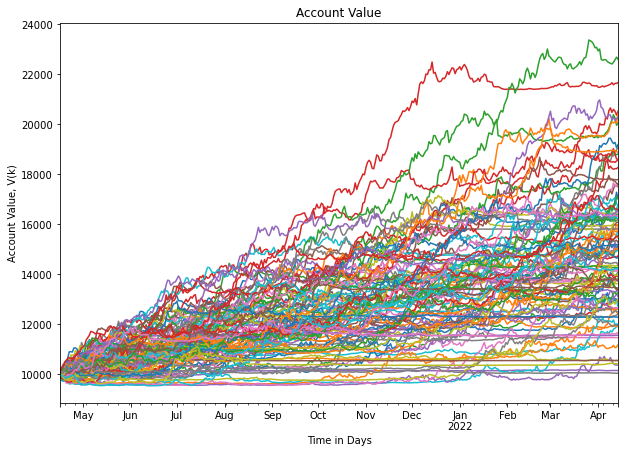

In [71]:
# Max Drawdown (gamma_2_star)

Vk_data_o = pd.DataFrame.copy(Prices.loc['2021-04-16':'2022-04-15'])
column_names = []
Vks = 0
V_start = 10000
stimu_pre = 100
for i in range(stimu_pre):
    column_names.append('DD'+str(i))
    Vk_list = [V_start]
    max_V = V_start
    Vk = V_start
    max_d = 0.05
    for t in range(sublen_pred-1):
        x = random.gauss(mu = 0, sigma = 1)
        S1 = math.exp((annualreturn - ((annualrevola**2)/2))*t_per_sub 
                      + (annualrevola*x*math.sqrt(t_per_sub))) * S0_pred
        re = (S1-S0_pred) / S0_pred  # daily return
        dk = (max_V-Vk) / max_V
        Mk = (max_d-dk) / (1-dk)
        Vk1 = Vk * (1 + (gamma_2_star*Mk*re))
        Vk_list.append(Vk1)
        if Vk1 >= max_V:
            max_V = Vk1
        Vk = Vk1  # update the account value
        S0_pred = S1  # update the stock price
    Vks += Vk
    Vk_data_o.insert(i+1, column_names[-1], Vk_list) 

Vk_data_o = Vk_data_o.drop('Adj Close', axis=1)
print('Avg return:', (Vks/stimu_pre - V_start) / V_start)

Vk_data_o.plot(title = "Account Value", legend=None)
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTC_100_o.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_100_o.eps', format='eps', dpi=1000)
plt.show()

# delta改成其他長度

In [233]:
# 改成restart日和前t1日算出來的gamma

ep = 0.005  # epsilon
max_d = 0.1

delta = int(Y2 / 2)  # 自訂為一季


# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S0))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

max J(r) = 0.05711000322940835
gamma* =  5.158572826913716


In [234]:
c = 0
V_start = 10000
V_all2 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all2) < Y2:
    hits_last_index = (Prices.index[Prices['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
    H1 = str(Prices['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        ri = GetGamma(H1, hits[-1], max_d, V_all2[-1])[1]
    print(ri)
    Vi_list, hit, di_list = Restart(hits[-1], '2022-04-14', ri, max_d, ep, V_all2[-1])  # 索引日期.tolist()=[]問題
    V_all2 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    if hit != 0 and hit <= N:
        hittime = str(Prices['Date'][hit])[:10]
        #print('h', hittime)
        hits.append(hittime)
        print('hitlist', hits)
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all2))
print('撞到限制的期數:', hits)

2020-10-16 2021-04-16
5.158572826913716
最大跌幅: 0.09421906482007507 32
hitlist ['2021-04-16', '2021-05-19']
1
2020-11-18 2021-05-19
3.449343762245155
最大跌幅: 0.09421906482007507 32
2
364
撞到限制的期數: ['2021-05-19']


          Date
367 2021-04-16
368 2021-04-17
369 2021-04-18
370 2021-04-19
371 2021-04-20
..         ...
726 2022-04-10
727 2022-04-11
728 2022-04-12
729 2022-04-13
730 2022-04-14

[364 rows x 1 columns]
          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17   9925.522132
369 2021-04-18   9574.025383
370 2021-04-19   9548.113917
371 2021-04-20   9586.106773
372 2021-04-21   9448.676894
373 2021-04-22   9356.629175
374 2021-04-23   9332.865524
375 2021-04-24   9297.820507
376 2021-04-25   9265.694349
最後一天的帳戶餘額: 9008.890356350363
最後一天和第一天相比的報酬率: -0.09911096436496374


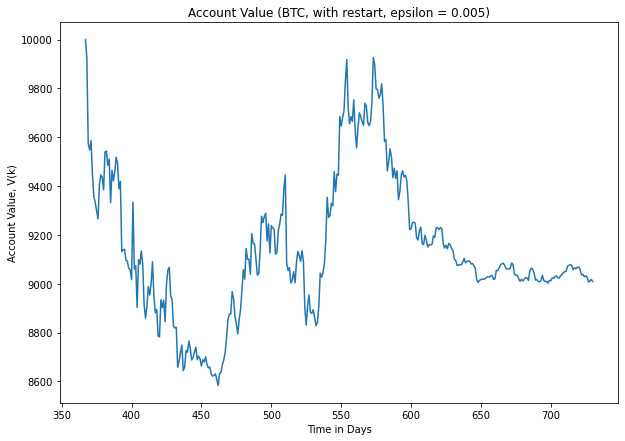

In [235]:
# 時間和帳戶餘額的關係

Vk_data_re = pd.DataFrame()
Vk_data_re = Vk_data_re.assign(Date = Prices['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re = Vk_data_re.assign(Restart = V_all2)

print(Vk_data_re.head(10))
print('最後一天的帳戶餘額:', V_all2[-1])
return_DD_re = (V_all2[-1]-V_start) / V_start
print('最後一天和第一天相比的報酬率:', return_DD_re)

Vk_data_re['Restart'].plot(title = "Account Value (BTC, with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTC_restart_halfyear_0.1.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_restart_halfyear_0.1.eps', format='eps', dpi=1000)
plt.show()

In [250]:
# 改成restart日和前半年算出來的gamma

ep = 0.005
max_d = 0.05

delta = int(Y2 / 2)  # 半年

# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S0))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

max J(r) = 0.05914941366710869
gamma* =  6.035593898192838


In [251]:
c = 0
V_start = 10000
V_all2 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all2) < Y2:
    hits_last_index = (Prices.index[Prices['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
    H1 = str(Prices['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        ri = GetGamma(H1, hits[-1], max_d, V_all2[-1])[1]
    print(ri)  # 這輪使用的gamma*
    Vi_list, hit, di_list = Restart(hits[-1], '2022-04-14', ri, max_d, ep, V_all2[-1])  # 索引日期.tolist()=[]問題
    V_all2 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    if hit != 0 and hit <= N:
        hittime = str(Prices['Date'][hit])[:10]
        #print('h', hittime)
        hits.append(hittime)
        print('hitlist', hits)
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all2))
print('撞到限制的期數:', hits)

2020-10-16 2021-04-16
6.035593898192838
最大跌幅: 0.039882629008463115 9
hitlist ['2021-04-16', '2021-05-12']
1
2020-11-11 2021-05-12
7.107797754584924
最大跌幅: 0.039882629008463115 9
hitlist ['2021-04-16', '2021-05-12', '2021-05-19']
2
2020-11-18 2021-05-19
3.826804532035146
最大跌幅: 0.044582720398752544 264
hitlist ['2021-04-16', '2021-05-12', '2021-05-19', '2022-01-20']
3
2021-07-22 2022-01-20
2.144941102144779
最大跌幅: 0.044582720398752544 264
4
364
撞到限制的期數: ['2021-05-12', '2021-05-19', '2022-01-20']


          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17   9956.429988
369 2021-04-18   9753.615433
370 2021-04-19   9740.220917
371 2021-04-20   9759.702865
372 2021-04-21   9688.455040
373 2021-04-22   9643.219735
374 2021-04-23   9632.053941
375 2021-04-24   9615.787248
376 2021-04-25   9601.173710
最後一天的帳戶餘額: 9025.309726274943
Return: -0.09746902737250566
SD: 202.60189237165523
Sharpe Ratio: -0.00048108646089893066


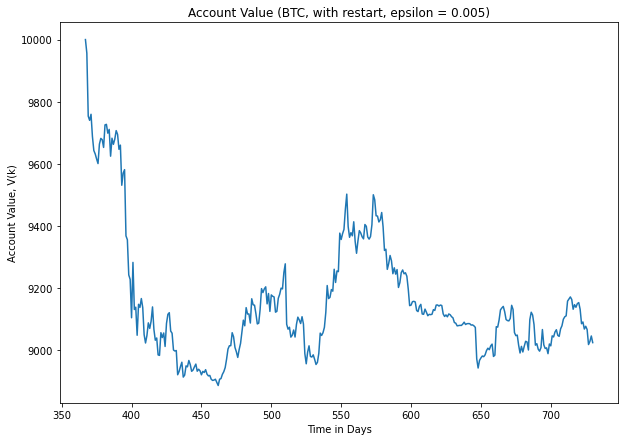

In [252]:
# 時間和帳戶餘額的關係

Vk_data_re_2 = pd.DataFrame()
Vk_data_re_2 = Vk_data_re_2.assign(Date = Prices['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_2 = Vk_data_re_2.assign(Restart = V_all2)

print(Vk_data_re_2.head(10))
print('最後一天的帳戶餘額:', V_all2[-1])
return_half = (V_all2[-1]-V_start) / V_start
print('Return:', return_half)
sd_half = float(Vk_data_re_2['Restart'].std())
print('SD:', sd_half)
print('Sharpe Ratio:', return_half/sd_half)

Vk_data_re_2['Restart'].plot(title = "Account Value (BTC, with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTC_restart_halfyear_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_restart_halfyear_0.05.eps', format='eps', dpi=1000)
plt.show()

In [293]:
# 改成restart日和前30日算出來的gamma

ep = 0.005  # epsilon
max_d = 0.05

delta = int(Y2 / 12)  # 自訂為一季


# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S0))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

max J(r) = 0.06037824230945982
gamma* =  5.8468355055813


In [294]:
c = 0
V_start = 10000
V_all3 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all3) < Y2:
    hits_last_index = (Prices.index[Prices['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
    H1 = str(Prices['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        ri = GetGamma(H1, hits[-1], max_d, V_all3[-1])[1]
    print(ri)
    Vi_list, hit, di_list = Restart(hits[-1], '2022-04-14', ri, max_d, ep, V_all3[-1])  # 索引日期.tolist()=[]問題
    V_all3 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    if hit != 0 and hit <= N:
        hittime = str(Prices['Date'][hit])[:10]
        hits.append(hittime)
        print('hitlist', hits)
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all3))
print('撞到限制的期數:', hits)

2021-03-17 2021-04-16
5.8468355055813
最大跌幅: 0.039254941292305924 9
hitlist ['2021-04-16', '2021-05-12']
1
2021-04-12 2021-05-12
-0.7197551046046513
最大跌幅: 0.039254941292305924 9
2
364
撞到限制的期數: ['2021-05-12']


          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17   9957.792605
369 2021-04-18   9760.734371
370 2021-04-19   9747.394535
371 2021-04-20   9766.830787
372 2021-04-21   9695.916838
373 2021-04-22   9650.361173
374 2021-04-23   9639.005227
375 2021-04-24   9622.417766
376 2021-04-25   9607.450587
最後一天的帳戶餘額: 9503.098340050818
最後一天和第一天相比的報酬率: -0.049690165994918246


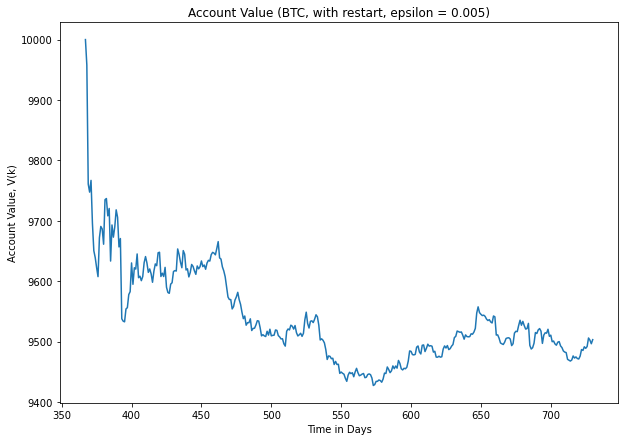

In [295]:
# 時間和帳戶餘額的關係

Vk_data_re = pd.DataFrame()
Vk_data_re = Vk_data_re.assign(Date = Prices['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re = Vk_data_re.assign(Restart = V_all3)

print(Vk_data_re.head(10))
print('最後一天的帳戶餘額:', V_all3[-1])
return_DD_re = (V_all3[-1]-V_start) / V_start
print('最後一天和第一天相比的報酬率:', return_DD_re)

Vk_data_re['Restart'].plot(title = "Account Value (BTC, with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTC_restart_month_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_restart_month_0.05.eps', format='eps', dpi=1000)
plt.show()

In [299]:
return_month = (V_all3[-1]-V_start) / V_start
print('Return:', return_month)
sd_month = float(Vk_data_re['Restart'].std())
print('SD:', sd_month)
print('Sharpe Ratio:', return_month/sd_month)

Return: -0.049690165994918246
SD: 78.245755643253
Sharpe Ratio: -0.0006350525416544167


In [290]:
# 改成restart日和前14日算出來的gamma

ep = 0.005  # epsilon
max_d = 0.05

delta = 14  # 自訂為兩週

# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S0))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

max J(r) = 0.059680352611298434
gamma* =  6.734027360927913


In [291]:
c = 0
V_start = 10000
V_all14 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all14) < Y2:
    hits_last_index = (Prices.index[Prices['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
    H1 = str(Prices['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        ri = GetGamma(H1, hits[-1], max_d, V_all14[-1])[1]
    print(ri)
    Vi_list, hit, di_list = Restart(hits[-1], '2022-04-14', ri, max_d, ep, V_all14[-1])  # 索引日期.tolist()=[]問題
    V_all14 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    print(hit)
    if hit != 0 and hit <= N:
        hittime = str(Prices['Date'][hit])[:10]
        hits.append(hittime)
        print('hitlist', hits)
    else:
        break
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all14))
print('撞到限制的期數:', hits)

2021-04-02 2021-04-16
6.734027360927913
最大跌幅: 0.04197017802770697 9
393
hitlist ['2021-04-16', '2021-05-12']
1
2021-04-28 2021-05-12
2.806912157021017
最大跌幅: 0.04360979146319868 280
0
364
撞到限制的期數: ['2021-05-12']


          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17   9951.388105
369 2021-04-18   9727.603645
370 2021-04-19   9714.191896
371 2021-04-20   9733.573042
372 2021-04-21   9662.078572
373 2021-04-22   9618.672525
374 2021-04-23   9608.349861
375 2021-04-24   9593.458612
376 2021-04-25   9580.298220
最後一天的帳戶餘額: 9145.348322962815
Return: -0.08546516770371855
SD: 150.13961586959613
Sharpe Ratio: -0.0005692379536787239


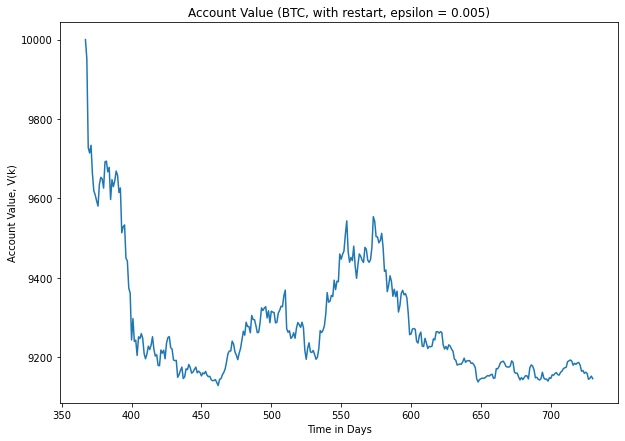

In [292]:
# 時間和帳戶餘額的關係

Vk_data_re_14 = pd.DataFrame()
Vk_data_re_14 = Vk_data_re_14.assign(Date = Prices['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_14 = Vk_data_re_14.assign(Restart = V_all14)

print(Vk_data_re_14.head(10))
print('最後一天的帳戶餘額:', V_all14[-1])
return_14 = (V_all14[-1]-V_start) / V_start
print('Return:', return_14)
sd_14 = float(Vk_data_re_14['Restart'].std())
print('SD:', sd_14)
print('Sharpe Ratio:', return_14/sd_14)

Vk_data_re_14['Restart'].plot(title = "Account Value (BTC, with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTC_restart_14days_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_restart_14days_0.05.eps', format='eps', dpi=1000)
plt.show()

In [296]:
# 改成restart日和前14日算出來的gamma

ep = 0.005  # epsilon
max_d = 0.05

delta = 10  # 自訂為兩週

# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma, max_gamma)  # 代過去的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S0))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

max J(r) = 0.24505925219002198
gamma* =  7.510148385421546


In [297]:
c = 0
V_start = 10000
V_all10 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all10) < Y2:
    hits_last_index = (Prices.index[Prices['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
    H1 = str(Prices['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        ri = GetGamma(H1, hits[-1], max_d, V_all14[-1])[1]
    print(ri)
    Vi_list, hit, di_list = Restart(hits[-1], '2022-04-14', ri, max_d, ep, V_all10[-1])  # 索引日期.tolist()=[]問題
    V_all10 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    print(hit)
    if hit != 0 and hit <= N:
        hittime = str(Prices['Date'][hit])[:10]
        hits.append(hittime)
        print('hitlist', hits)
    else:
        break
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all10))
print('撞到限制的期數:', hits)

2021-04-06 2021-04-16
7.510148385421546
最大跌幅: 0.04389697974093397 9
393
hitlist ['2021-04-16', '2021-05-12']
1
2021-05-02 2021-05-12
-9.736854691057761
最大跌幅: 0.04389697974093397 9
401
hitlist ['2021-04-16', '2021-05-12', '2021-05-20']
2
2021-05-10 2021-05-20


/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_27117/887591031.py:23: RuntimeWarning: overflow encountered in double_scalars
  Vk1 = Vk * (1 + (gamma*Mk*re))
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_27117/887591031.py:22: RuntimeWarning: invalid value encountered in double_scalars
  Mk = (max_d-dk) / (1-dk)
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_27117/887591031.py:21: RuntimeWarning: invalid value encountered in double_scalars
  dk = (max_V-Vk) / max_V
/var/folders/nb/6yqjwp4j44jglq03v9d7jpx80000gn/T/ipykernel_27117/887591031.py:21: RuntimeWarning: overflow encountered in double_scalars
  dk = (max_V-Vk) / max_V


-43.630188432121514
最大跌幅: 0.314328713242349 37
407
hitlist ['2021-04-16', '2021-05-12', '2021-05-20', '2021-05-26']
3
2021-05-16 2021-05-26
-3.452622347999495
最大跌幅: 0.314328713242349 37
493
hitlist ['2021-04-16', '2021-05-12', '2021-05-20', '2021-05-26', '2021-08-20']
4
2021-08-10 2021-08-20
31.01131299882983
最大跌幅: 0.314328713242349 37
499
hitlist ['2021-04-16', '2021-05-12', '2021-05-20', '2021-05-26', '2021-08-20', '2021-08-26']
5
2021-08-16 2021-08-26
25.269263772422057
最大跌幅: 0.314328713242349 37
503
hitlist ['2021-04-16', '2021-05-12', '2021-05-20', '2021-05-26', '2021-08-20', '2021-08-26', '2021-08-30']
6
2021-08-20 2021-08-30
5.145100549761832
最大跌幅: 0.314328713242349 37
605
hitlist ['2021-04-16', '2021-05-12', '2021-05-20', '2021-05-26', '2021-08-20', '2021-08-26', '2021-08-30', '2021-12-10']
7
2021-11-30 2021-12-10
-11.433331735981707
最大跌幅: 0.314328713242349 37
663
hitlist ['2021-04-16', '2021-05-12', '2021-05-20', '2021-05-26', '2021-08-20', '2021-08-26', '2021-08-30', '2021-12

          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17   9945.785408
369 2021-04-18   9699.306759
370 2021-04-19   9686.208853
371 2021-04-20   9704.999875
372 2021-04-21   9635.019386
373 2021-04-22   9594.692526
374 2021-04-23   9585.506431
375 2021-04-24   9572.400279
376 2021-04-25   9561.030203
最後一天的帳戶餘額: 11602.43740417668
Return: 0.16024374041766806
SD: 852.1189643479521
Sharpe Ratio: 0.00018805324974815904


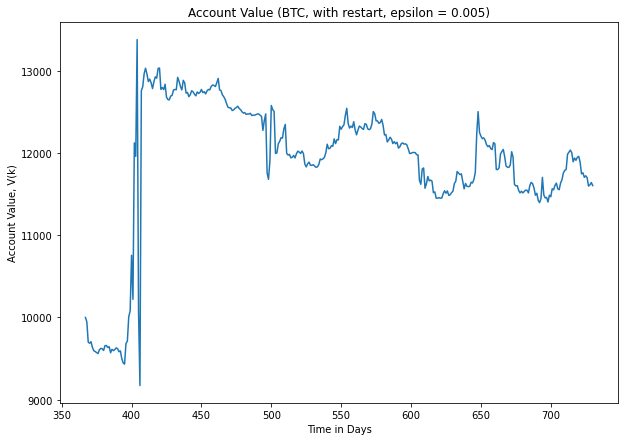

In [298]:
# 時間和帳戶餘額的關係

Vk_data_re_10 = pd.DataFrame()
Vk_data_re_10 = Vk_data_re_10.assign(Date = Prices['Date'].iloc[Y2_day0_index[0]:])
Vk_data_re_10 = Vk_data_re_10.assign(Restart = V_all10)

print(Vk_data_re_10.head(10))
print('最後一天的帳戶餘額:', V_all10[-1])
return_10 = (V_all10[-1]-V_start) / V_start
print('Return:', return_10)
sd_10 = float(Vk_data_re_10['Restart'].std())
print('SD:', sd_10)
print('Sharpe Ratio:', return_10/sd_10)

Vk_data_re_10['Restart'].plot(title = "Account Value (BTC, with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_BTC_restart_10days_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_BTC_restart_10days_0.05.eps', format='eps', dpi=1000)
plt.show()

In [45]:
# Tether
# 改成restart日和前7日算出來的gamma

ep = 0.005  # epsilon
max_d = 0.05

delta = 7  # 自訂為 7 days

# 生成1000個一年前區間內的gamma,模擬100次
r_list = []
Jr_list = []
for r in range(1000):
    r = np.random.uniform(min_gamma2, max_gamma2)  # 代過去的資料
    r_list.append(r)
    Jr_list.append(J_wo_gamma(r, 100, 0.05, 10000, S02, annualreturn2, annualrevola2, sublen2))
index = Jr_list.index(max(Jr_list))
print('max J(r) =', max(Jr_list))
gamma_star = r_list[index]
print('gamma* = ', gamma_star)

max J(r) = 0.0008755235480688508
gamma* =  42.06418981684346


In [46]:
c = 0
V_start = 10000
V_all7 = [V_start]
hits = ['2021-04-16']
d_list = [0]

while len(V_all7) < Y22:
    hits_last_index = (Prices2_reset.index[Prices2_reset['Date'] == hits[-1]]).tolist()
    hits_last_delta_index = [i-delta for i in hits_last_index]
    H1 = str(Prices2_reset['Date'][hits_last_delta_index[0]])[:10]
    print(H1, hits[-1])
    if c == 0:
        ri = gamma_star
    else:
        ri = GetGamma2(H1, hits[-1], max_d, V_all7[-1])[1]
    print(ri)
    Vi_list, hit, di_list = Restart2(hits[-1], '2022-04-14', ri, max_d, ep, V_all7[-1])  # 索引日期.tolist()=[]問題
    V_all7 += Vi_list[1:]
    d_list += di_list[1:]
    print('最大跌幅:', max(d_list), d_list.index(max(d_list)))
    print(hit)
    if hit != 0 and hit <= N2:
        hittime = str(Prices2_reset['Date'][hit])[:10]
        hits.append(hittime)
        print('hitlist', hits)
    else:
        break
    c += 1
    print(c)
hits = hits[1:]
print(len(V_all7))
print('撞到限制的期數:', hits)

2021-04-09 2021-04-16
42.06418981684346
最大跌幅: 0.026243073099483965 248
0
364
撞到限制的期數: []


          Date       Restart
367 2021-04-16  10000.000000
368 2021-04-17  10192.729441
369 2021-04-18   9950.575284
370 2021-04-19   9947.886978
371 2021-04-20   9948.700362
372 2021-04-21   9948.633098
373 2021-04-22   9950.398169
374 2021-04-23   9951.207689
375 2021-04-24   9948.354565
376 2021-04-25   9948.633920
最後一天的帳戶餘額: 9935.056678664283
Return: -0.006494332133571697
SD: 15.138560737645493
Sharpe Ratio: -0.0004289927058536057


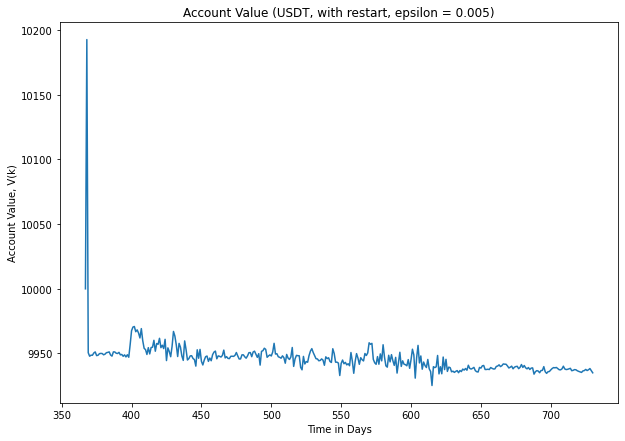

In [47]:
# 時間和帳戶餘額的關係

Vk_data_re_7 = pd.DataFrame()
Vk_data_re_7 = Vk_data_re_7.assign(Date = Prices2_reset['Date'].iloc[Y2_day0_index2[0]:])
Vk_data_re_7 = Vk_data_re_7.assign(Restart = V_all7)

print(Vk_data_re_7.head(10))
print('最後一天的帳戶餘額:', V_all7[-1])
return_7 = (V_all7[-1]-V_start) / V_start
print('Return:', return_7)
sd_7 = float(Vk_data_re_7['Restart'].std())
print('SD:', sd_7)
print('Sharpe Ratio:', return_7/sd_7)

Vk_data_re_7['Restart'].plot(title = "Account Value (USDT, with restart, epsilon = 0.005)")
plt.xlabel('Time in Days')
plt.ylabel('Account Value, V(k)')
fig = plt.gcf()
fig.set_size_inches(10, 7)
fig.savefig('DD_USDT_restart_7days_0.05.pdf', format='pdf', dpi=1000)
fig.savefig('DD_USDT_restart_7days_0.05.eps', format='eps', dpi=1000)
plt.show()

# 回測天數vs報酬率

In [ ]:
data = [3,4,2,3,4,5,4,7,8,5,4,6,2,1,0,9,7,6,6,5,4]
n, bins, patches=plt.hist(data,bins=20)
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram with 20 bins")
plt.show()